## How to look at MITgcm netCDF output, an example

You need to install MITgcmutils package (https://pypi.org/project/MITgcmutils/)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
import numpy as np
import xarray as xr
import MITgcmutils as MIT
import seaborn as sns

In [2]:
sns.set_context('notebook')
outdir = '../run_expand/mnc_0001/'
outdir2 = '../run_expand_nobay/mnc_0001/'

In [3]:
nc = MIT.mnc_files(outdir+'state.0000000000.t*.nc')
gr = MIT.mnc_files(outdir+'grid.t*.nc')
nc2 = MIT.mnc_files(outdir2+'state.0000000000.t*.nc')
#gr2 = MIT.mnc_files(outdir2+'grid.t*.nc')

In [4]:
import glob
from MITgcmutils import netcdf

# Asegúrate de que la variable `outdir` esté definida y sea correcta
for file in glob.glob(outdir + 'grid.t*.nc'):
    try:
        nc_file = netcdf.netcdf_file(file, 'r')
        print(f"Archivo {file} leído correctamente")
    except Exception as e:
        print(f"Error al leer {file}: {e}")


Archivo ../run_expand/mnc_0001/grid.t150.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t010.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t101.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t041.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t232.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t075.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t135.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t024.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t164.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t206.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t197.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t086.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t247.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t096.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t187.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t216

In [5]:
# Load some grid variables
depth = gr.variables['Depth'][:]
hFacC = gr.variables['HFacC'][:]
XC = gr.variables['XC'][:]
YC = gr.variables['YC'][:]
XG = gr.variables['XG'][:]
YG = gr.variables['YG'][:]
RC = gr.variables['RC'][:]
RL = gr.variables['RL'][:]
mask = np.ma.getmask(np.ma.masked_values(depth, 0))
mask3D = np.ma.getmask(np.ma.masked_values(hFacC[:,:], 0))
time = nc.variables['T'][:]
timetotal = nc.variables['T'][:]

In [6]:
mask3D.shape

(40, 320, 272)

In [7]:
nc.variables

{'T': <MITgcmutils.mnc.MNCVariable at 0x14747fc20>,
 'iter': <MITgcmutils.mnc.MNCVariable at 0x3132572f0>,
 'Xp1': <MITgcmutils.mnc.MNCVariable at 0x3122f0d40>,
 'Y': <MITgcmutils.mnc.MNCVariable at 0x4ef962b70>,
 'Z': <MITgcmutils.mnc.MNCVariable at 0x4ef963ce0>,
 'U': <MITgcmutils.mnc.MNCVariable at 0x4ef960290>,
 'X': <MITgcmutils.mnc.MNCVariable at 0x4ef963650>,
 'Yp1': <MITgcmutils.mnc.MNCVariable at 0x4ef963530>,
 'V': <MITgcmutils.mnc.MNCVariable at 0x4ef963680>,
 'Temp': <MITgcmutils.mnc.MNCVariable at 0x4ef963590>,
 'S': <MITgcmutils.mnc.MNCVariable at 0x4ef9633e0>,
 'Eta': <MITgcmutils.mnc.MNCVariable at 0x4ef963470>,
 'Zl': <MITgcmutils.mnc.MNCVariable at 0x4ef963440>,
 'W': <MITgcmutils.mnc.MNCVariable at 0x4ef962b40>}

In [8]:
len(XC)
XC[0,:]

array([-810000.  , -746000.  , -686000.  , -630000.  , -578000.  ,
       -530000.  , -486000.  , -446000.  , -410000.  , -378000.  ,
       -350000.  , -326000.  , -306000.  , -290000.  , -278000.  ,
       -270000.  , -266000.  , -263995.8 , -261987.35, -259978.9 ,
       -257970.45, -255962.  , -253953.6 , -251945.15, -249936.7 ,
       -247928.3 , -245919.85, -243911.4 , -241902.95, -239894.5 ,
       -237886.1 , -235877.65, -233869.2 , -231860.75, -229852.3 ,
       -227843.9 , -225835.45, -223827.  , -221818.55, -219810.1 ,
       -217801.7 , -215793.25, -213784.8 , -211776.4 , -209767.95,
       -207759.5 , -205751.05, -203742.6 , -201734.2 , -199725.75,
       -197717.3 , -195708.85, -193700.4 , -191692.  , -189683.55,
       -187675.1 , -185666.65, -183658.2 , -181649.8 , -179641.35,
       -177632.9 , -175624.5 , -173616.05, -171607.6 , -169599.15,
       -167590.7 , -165582.3 , -163573.85, -161565.4 , -159556.95,
       -157548.5 , -155540.1 , -153531.65, -151523.2 , -149514

In [9]:
272/2

136.0

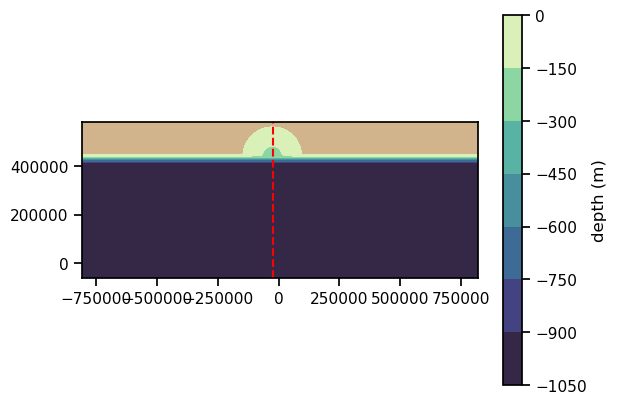

In [10]:
# Plot bathymetry
fig, ax = plt.subplots(1,1)
ax.set_facecolor('tan')
pc = ax.contourf(XC[0,:],YC[:,0],
                np.ma.masked_array(-depth, mask=mask),
                cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, label='depth (m)')
# Añade una línea en el eje Y para una coordenada específica en XC
x_coord = XC[0,136]# Cambia este valor a la coordenada de XC donde quieres la línea
ax.axvline(x=x_coord, color='red', linestyle='--', label=f'XC = {x_coord}')

ax.set_aspect(1)  

In [11]:
Eta = nc.variables['Eta']
Eta.shape

(61, 320, 272)

In [12]:
W = nc.variables['W'][:,:,:,:]
W.shape

(61, 40, 320, 272)

In [13]:
len(time)

61

W[time,Z,RC,YC,XC]

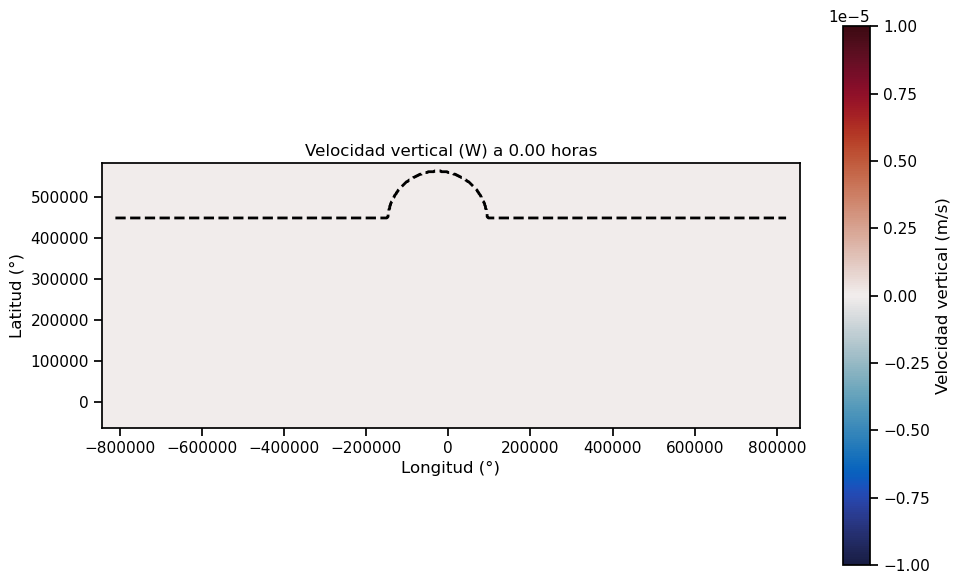

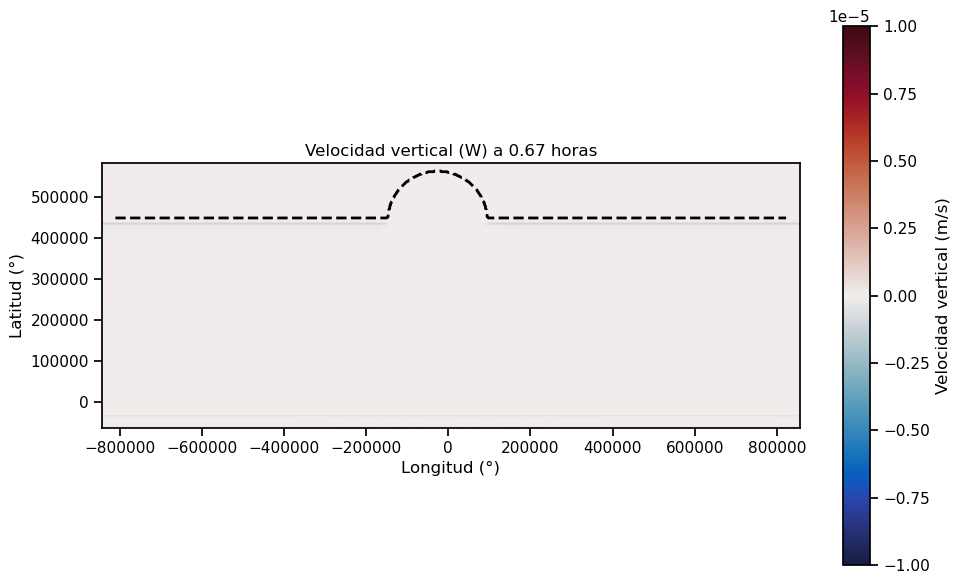

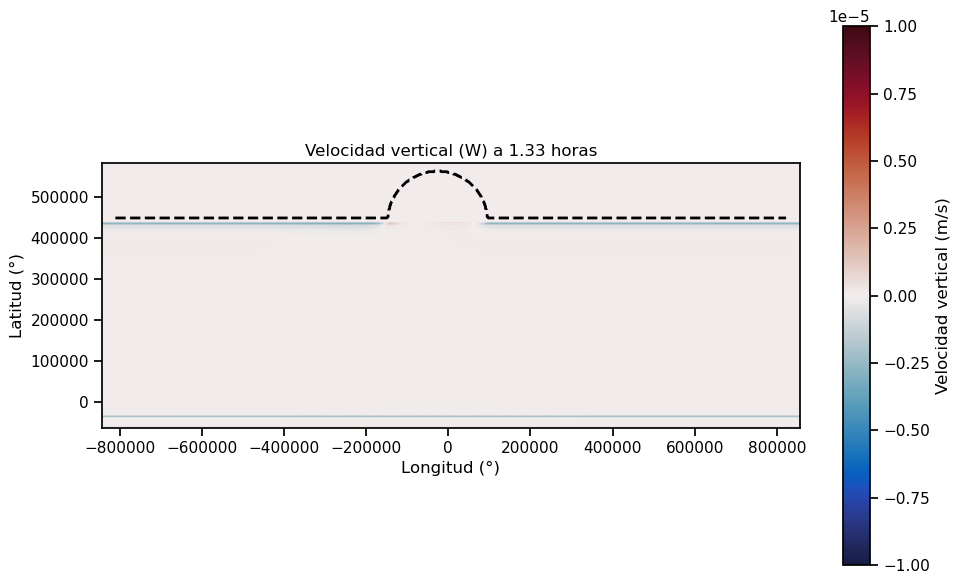

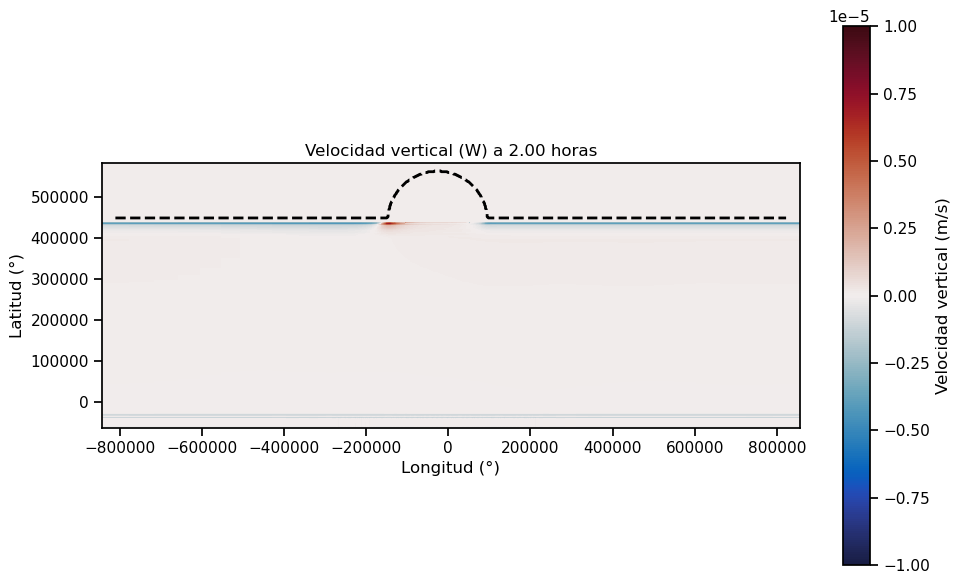

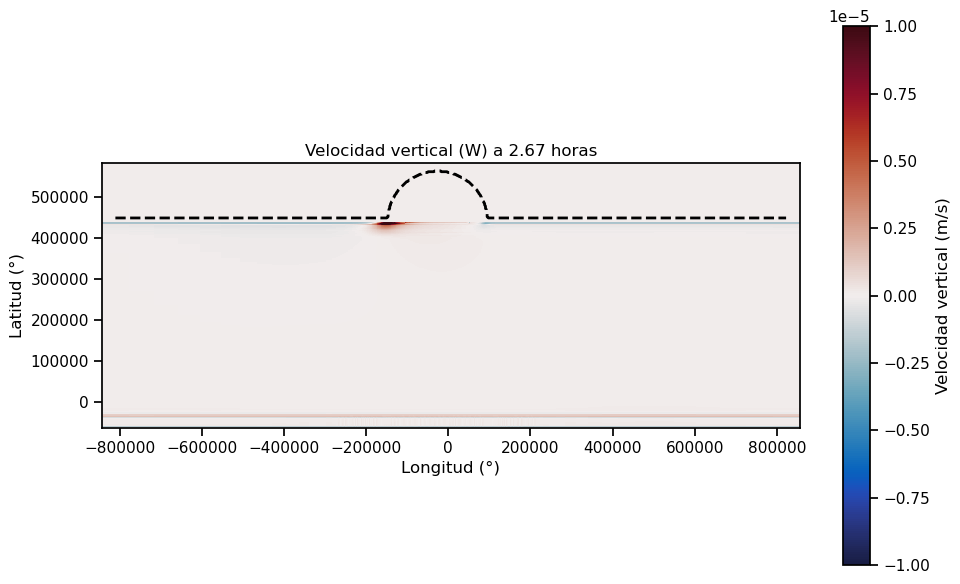

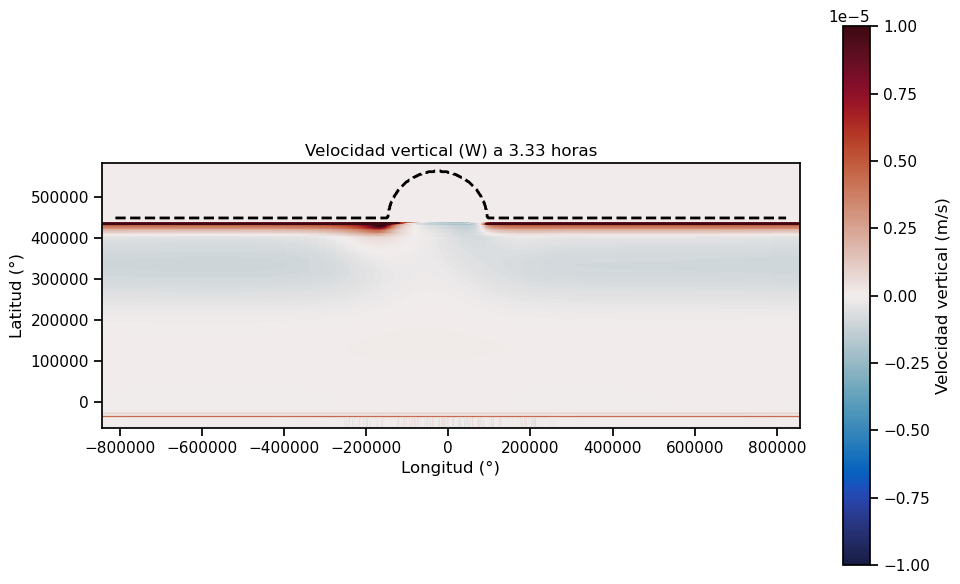

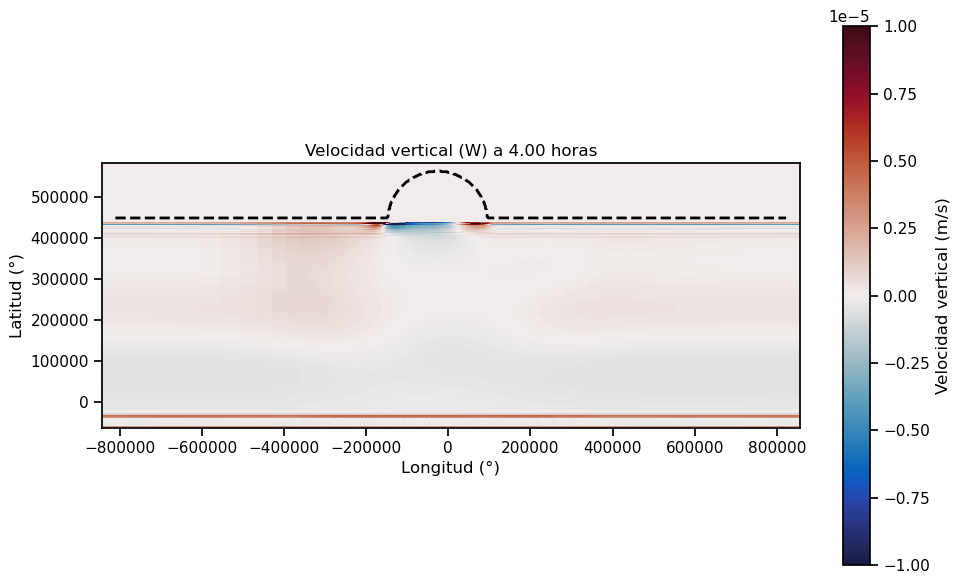

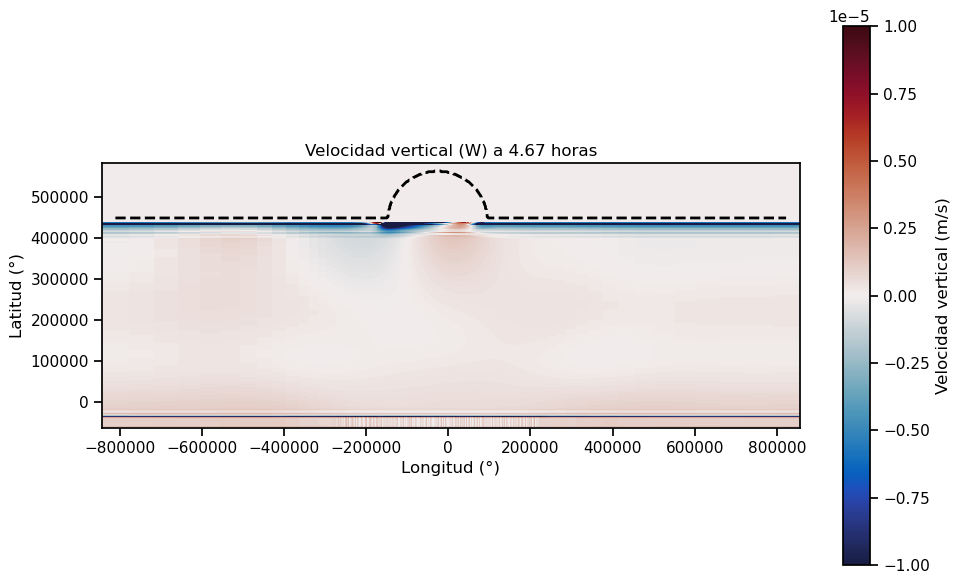

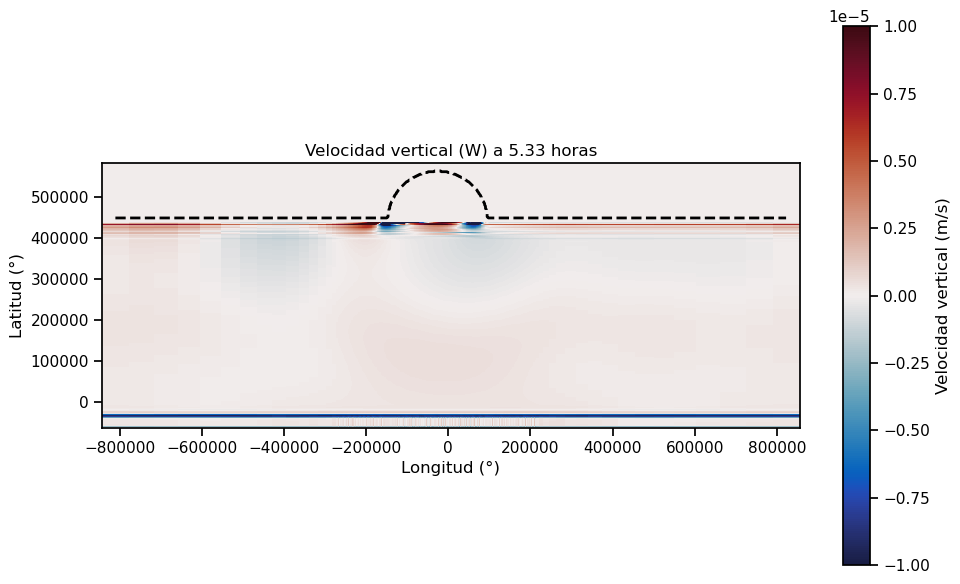

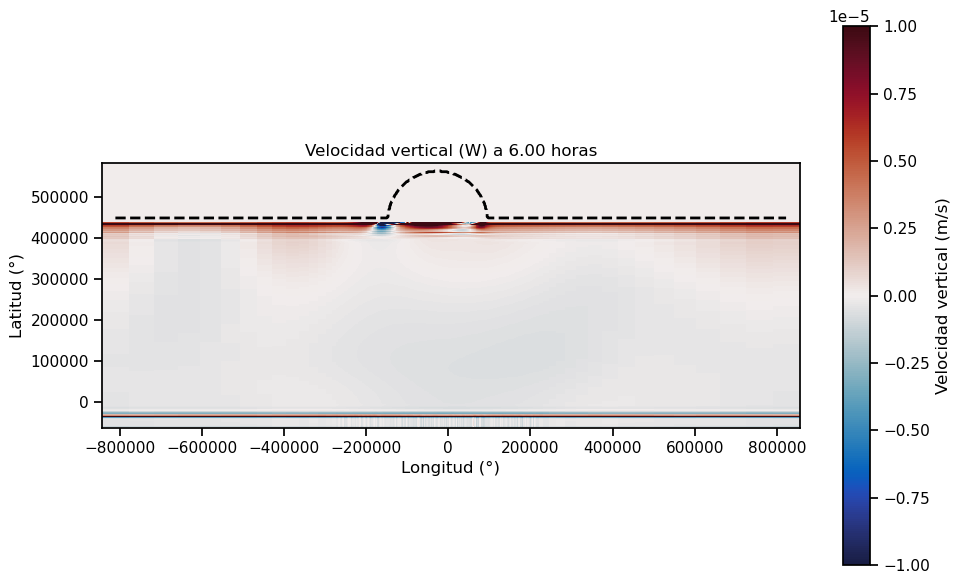

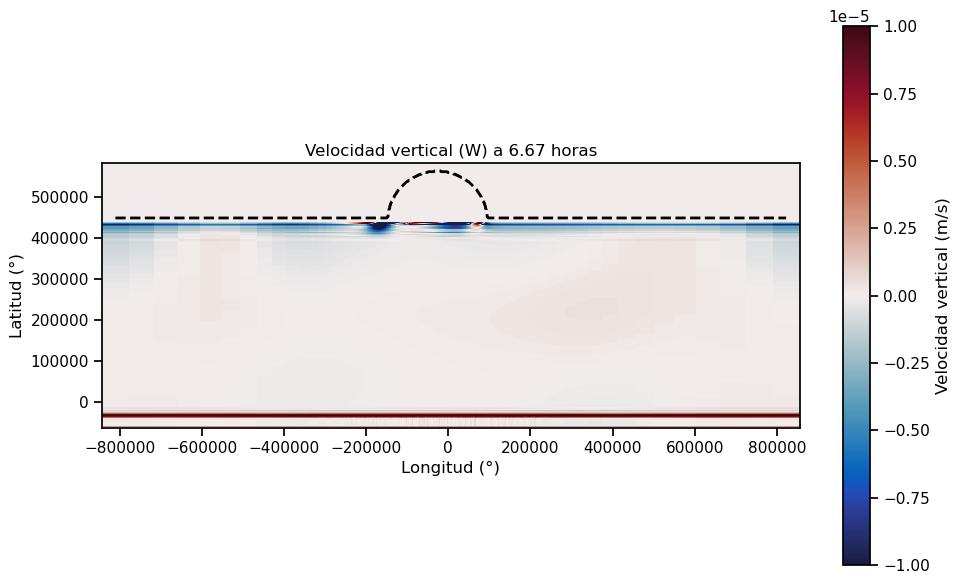

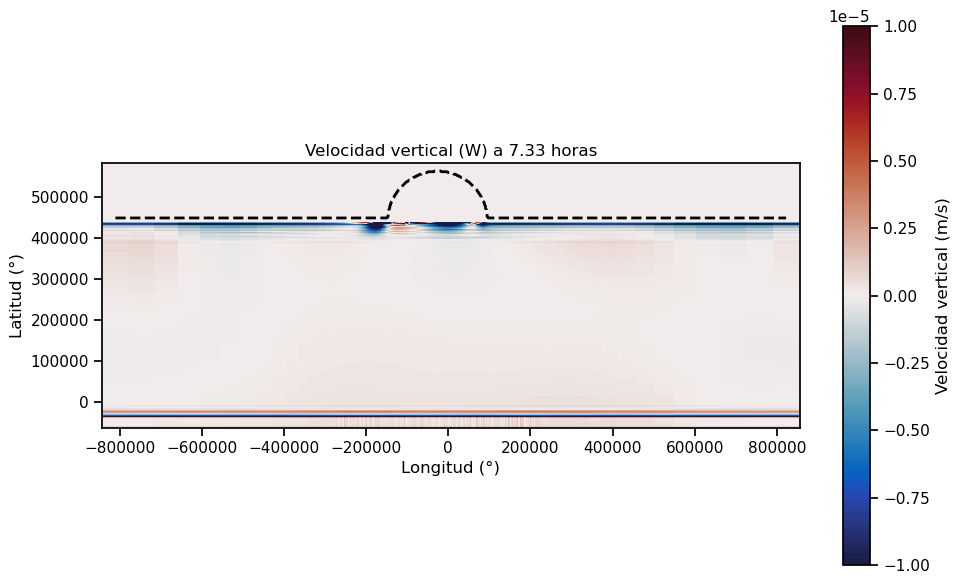

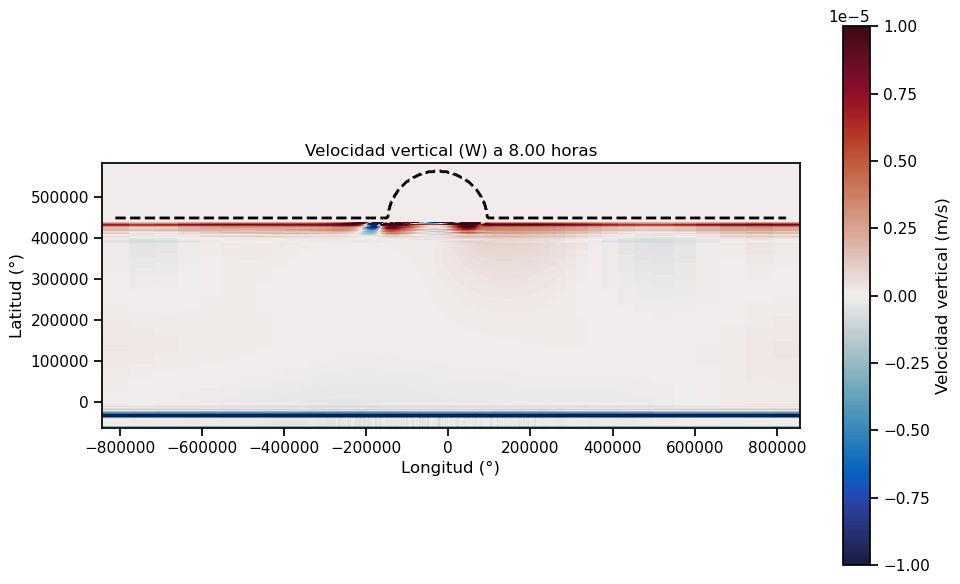

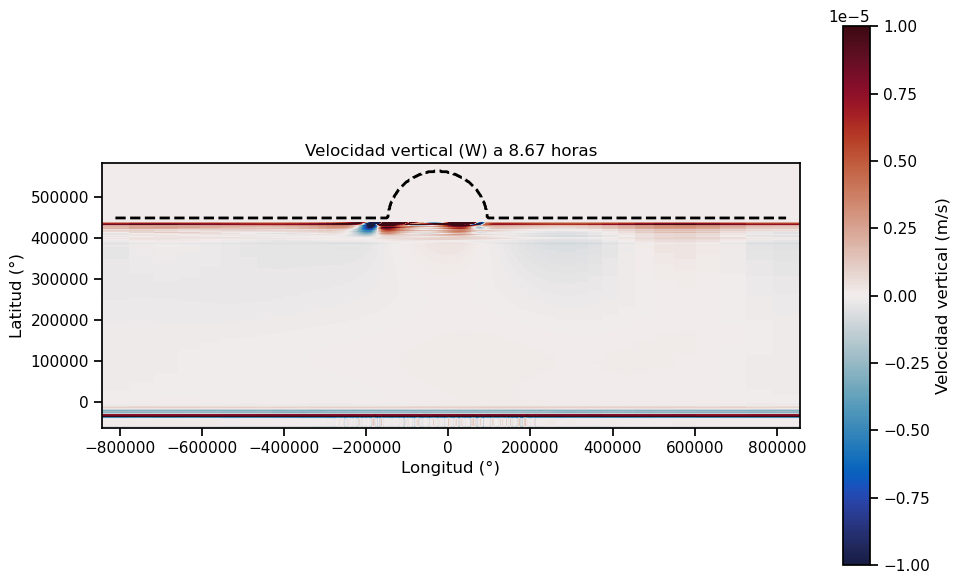

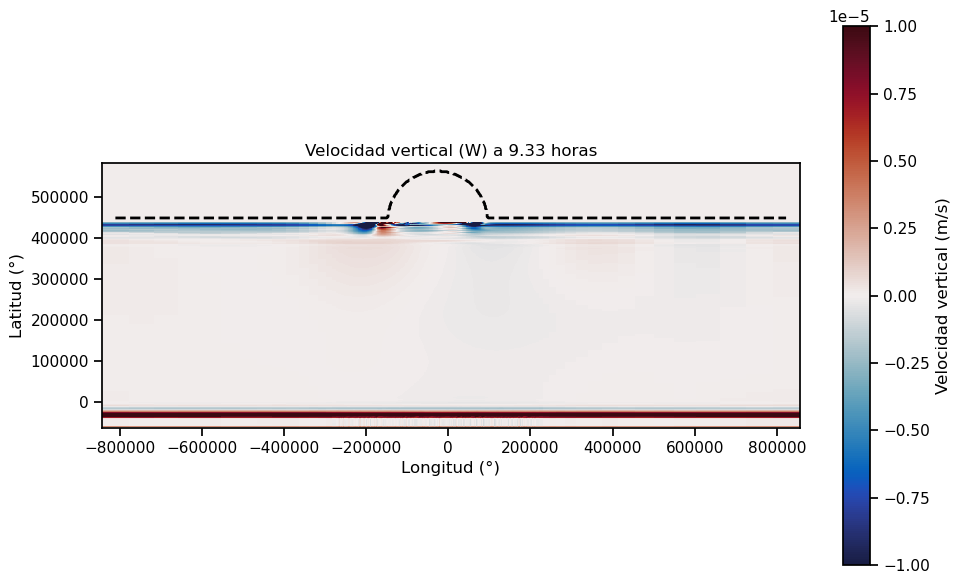

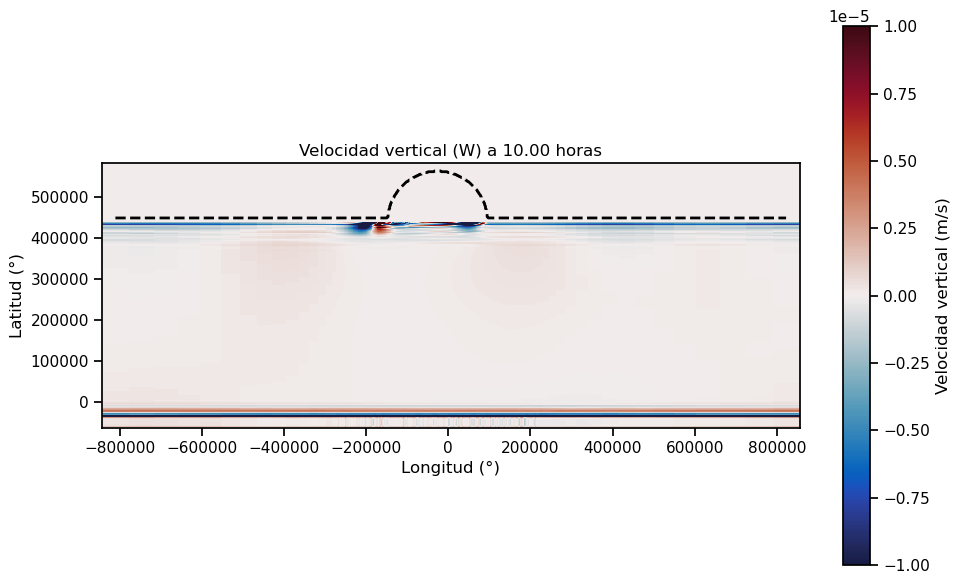

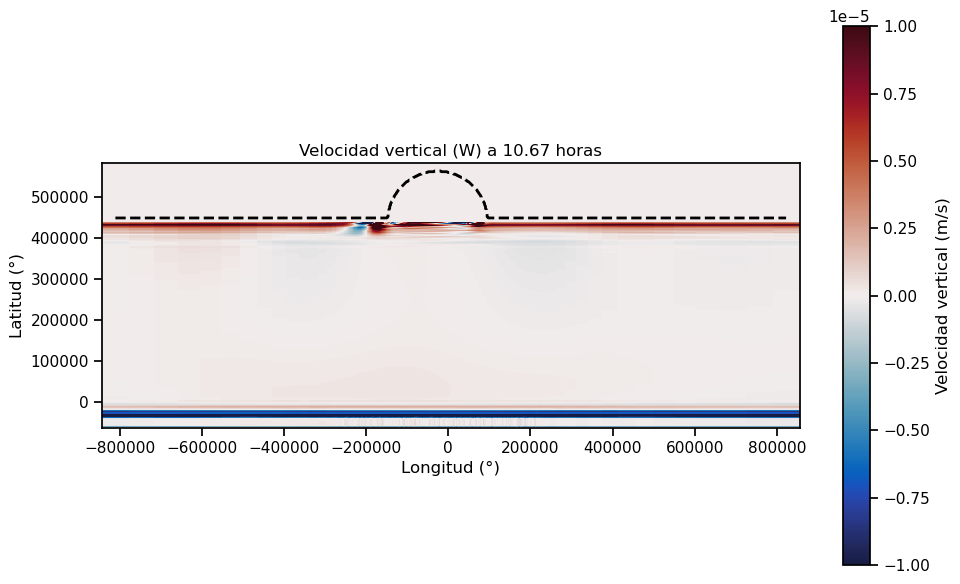

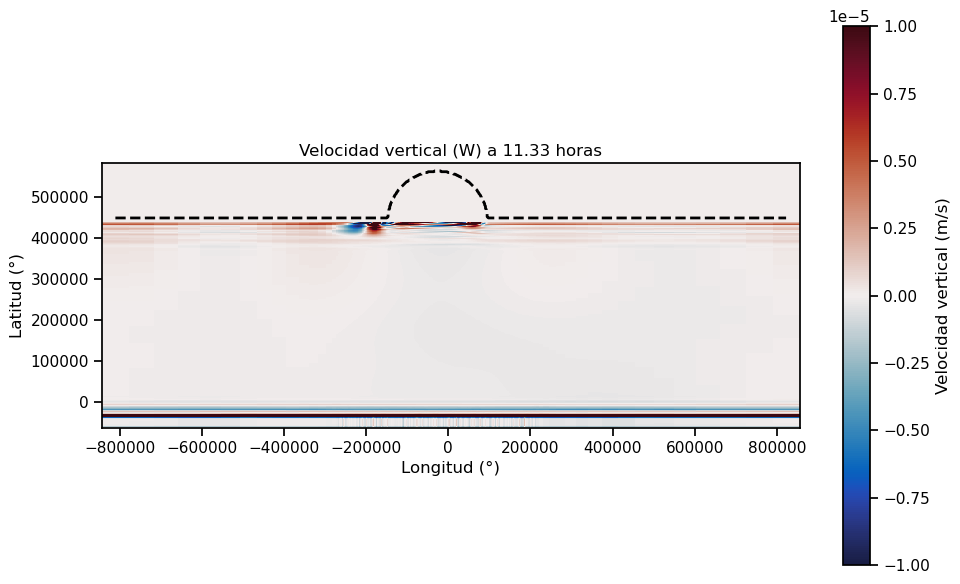

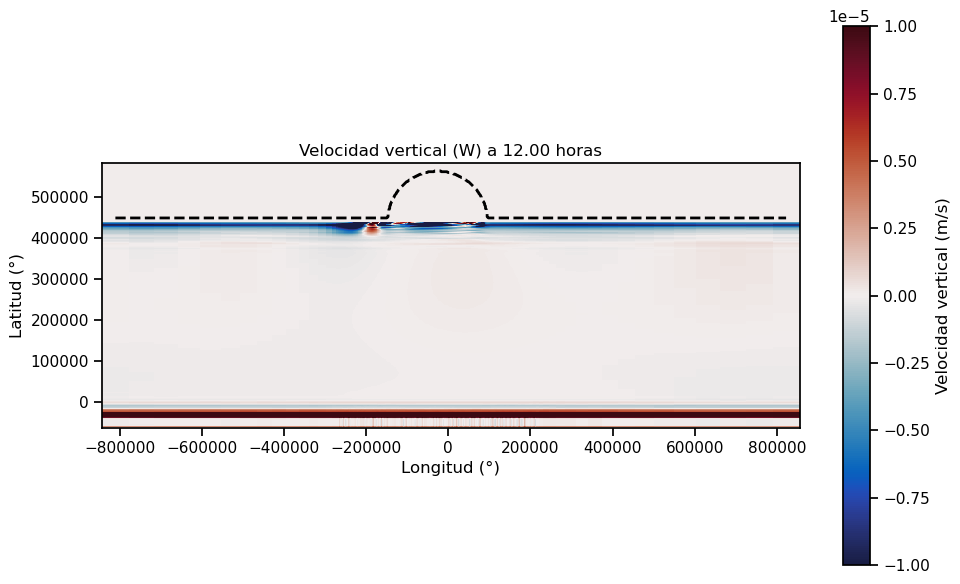

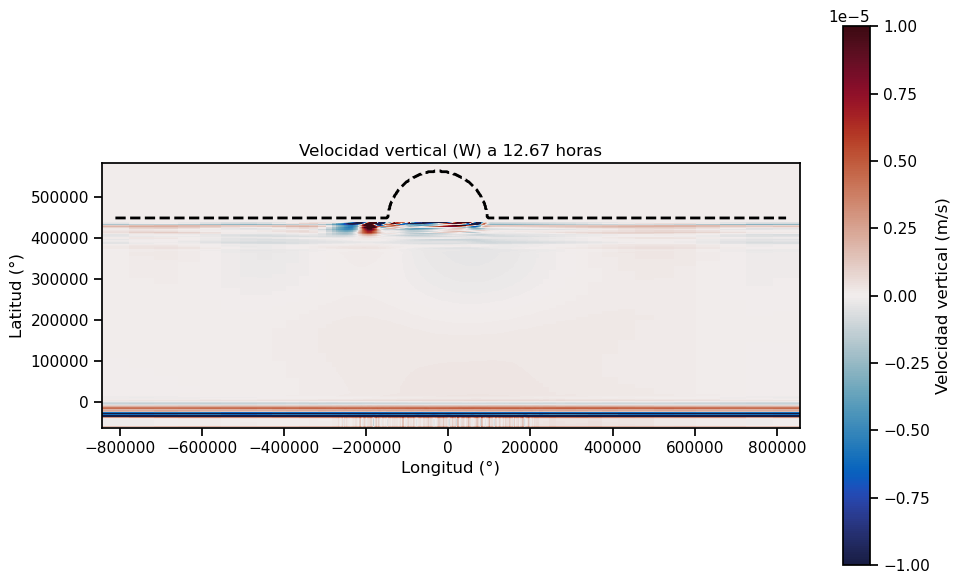

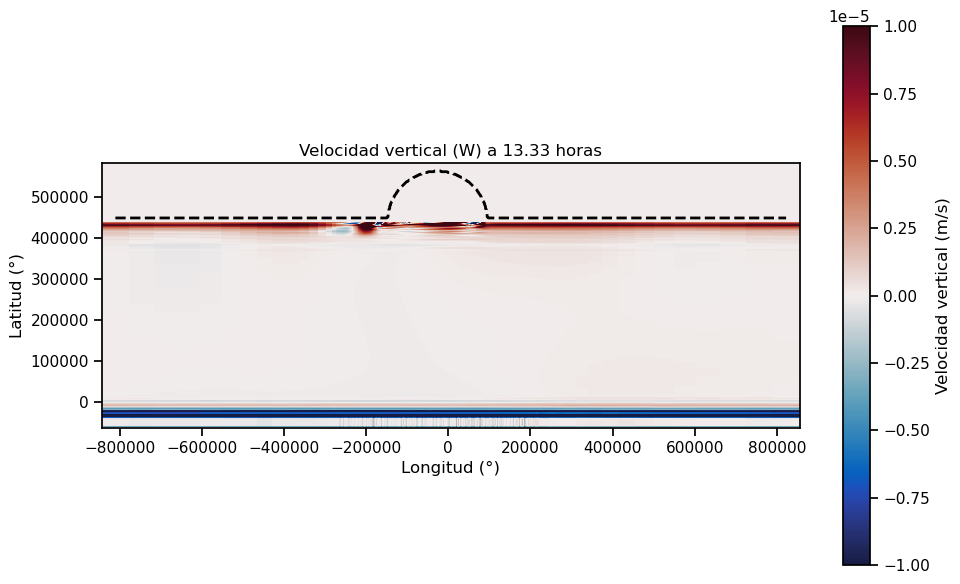

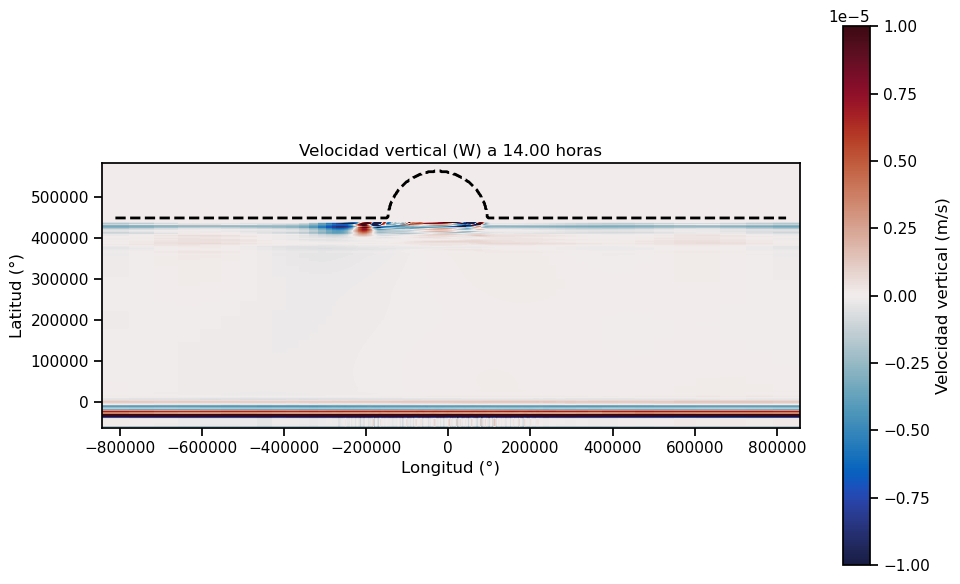

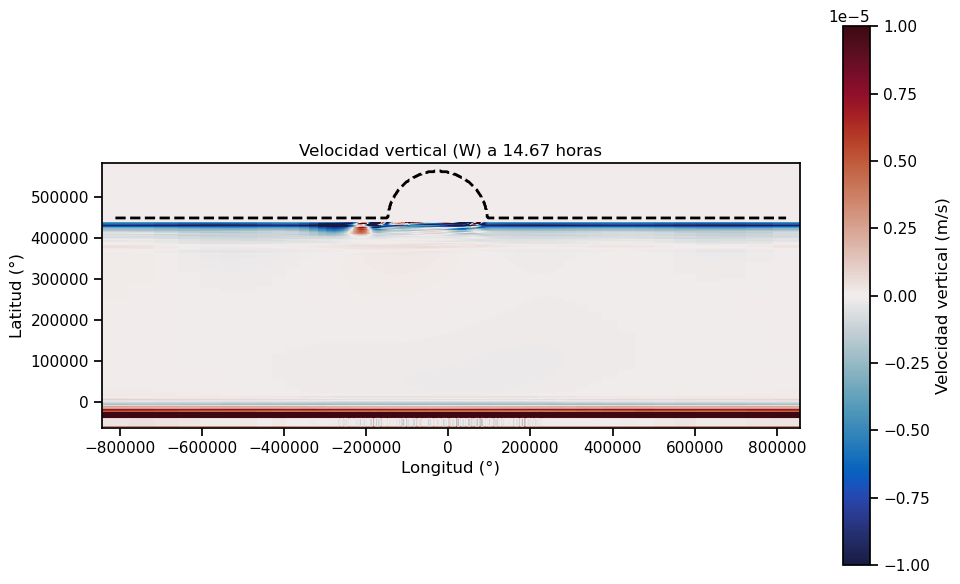

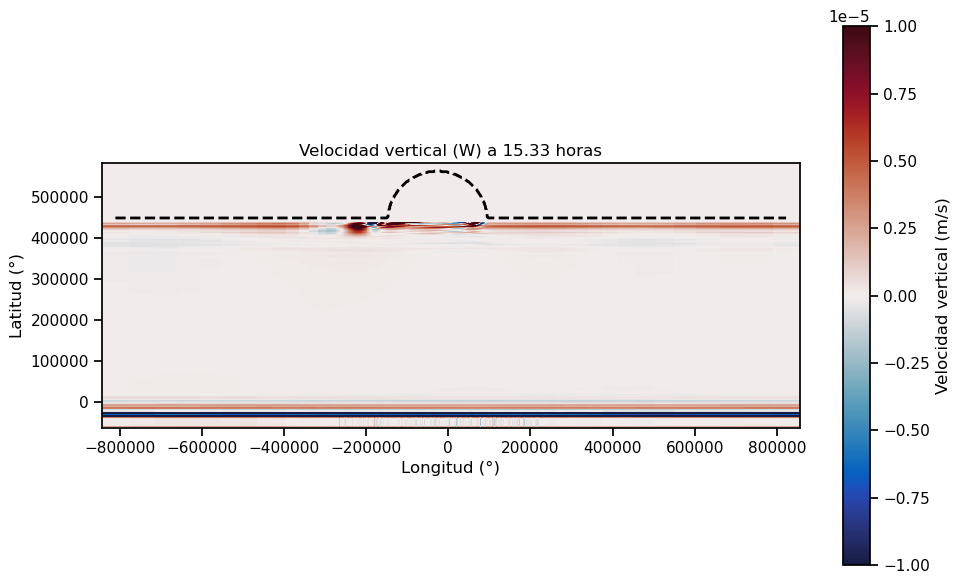

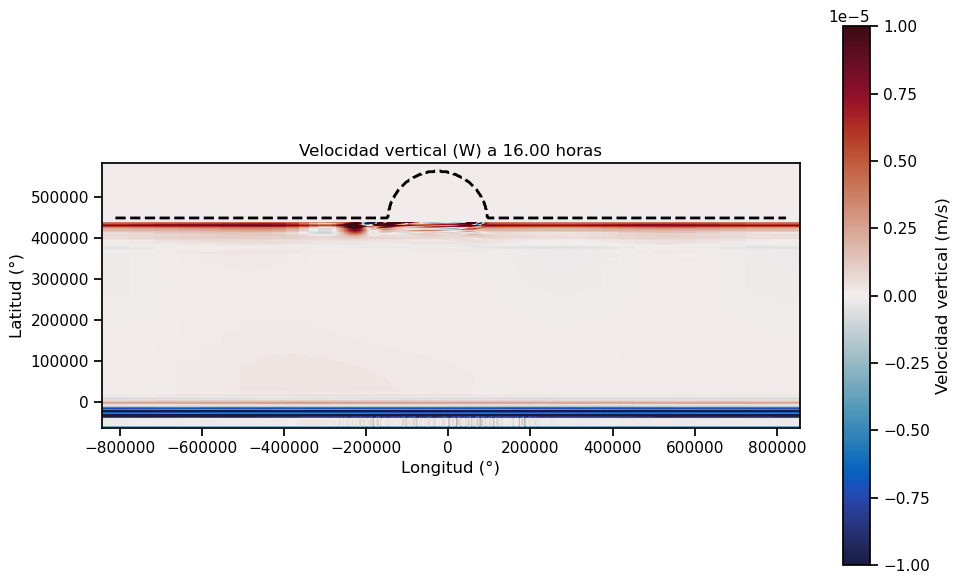

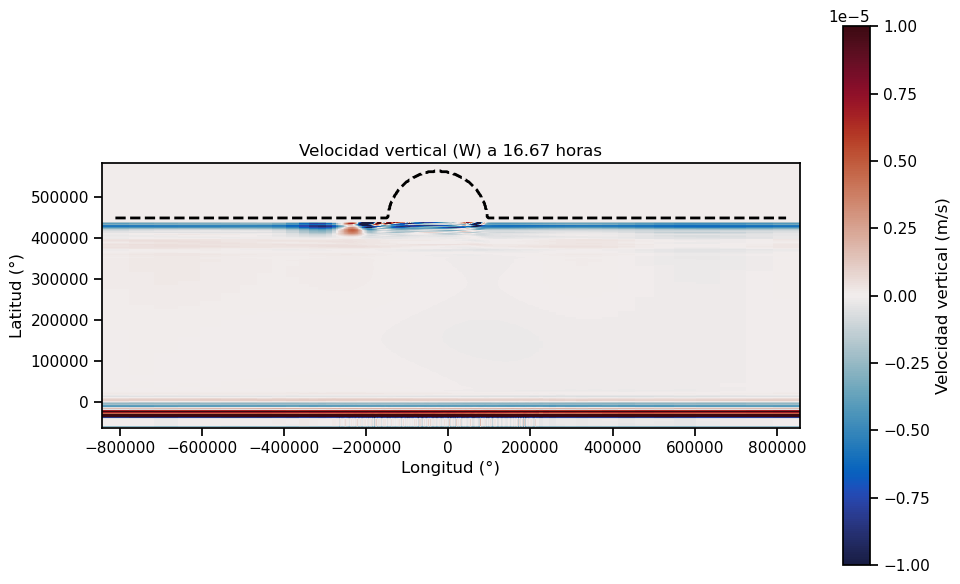

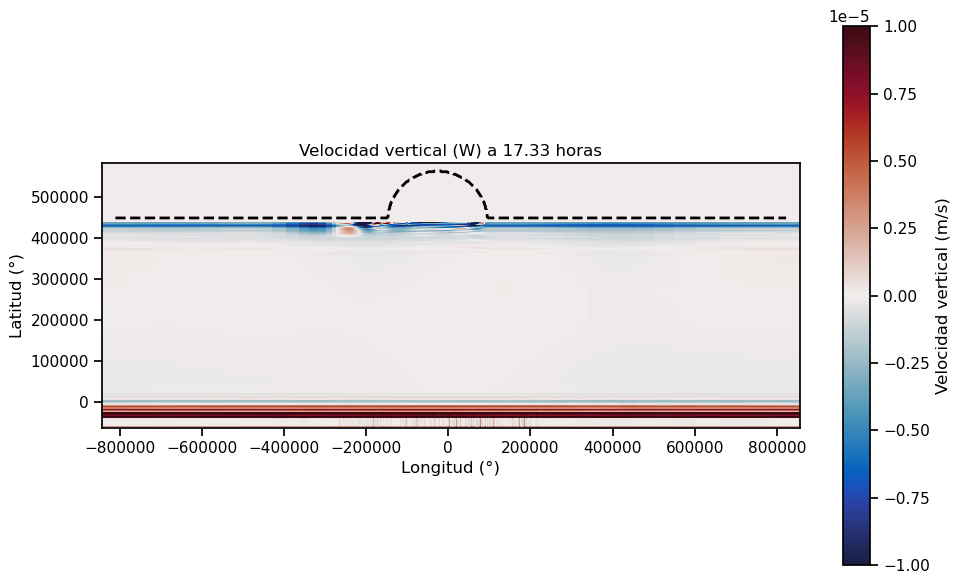

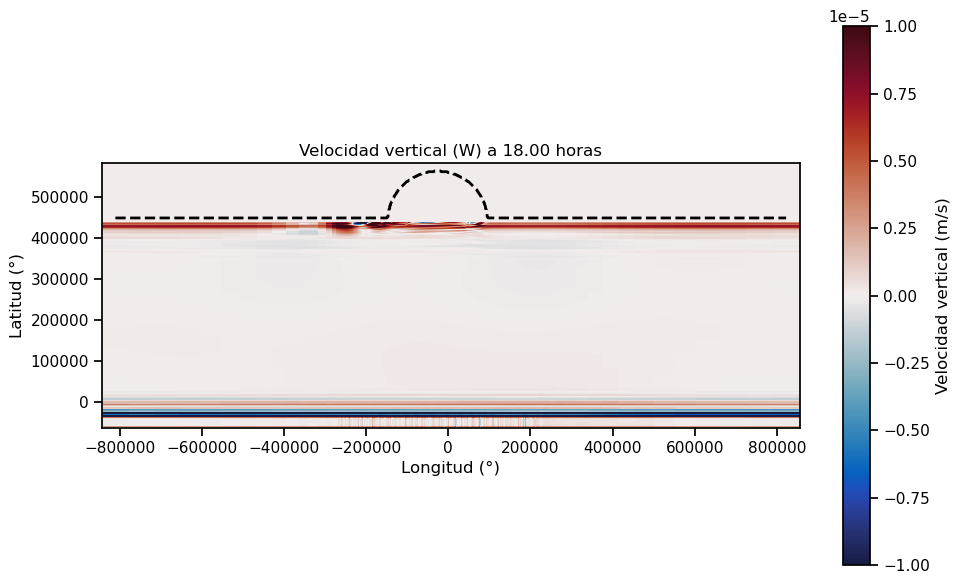

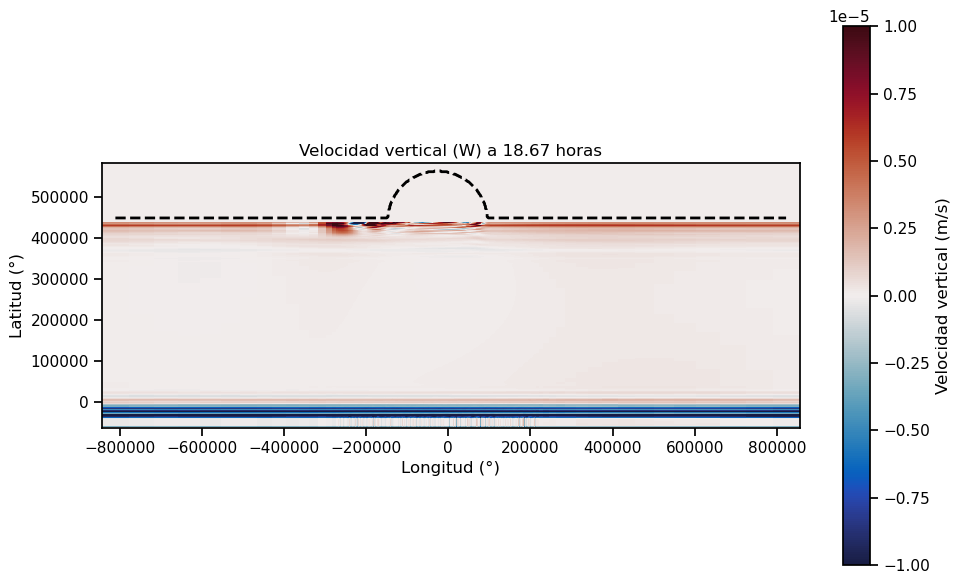

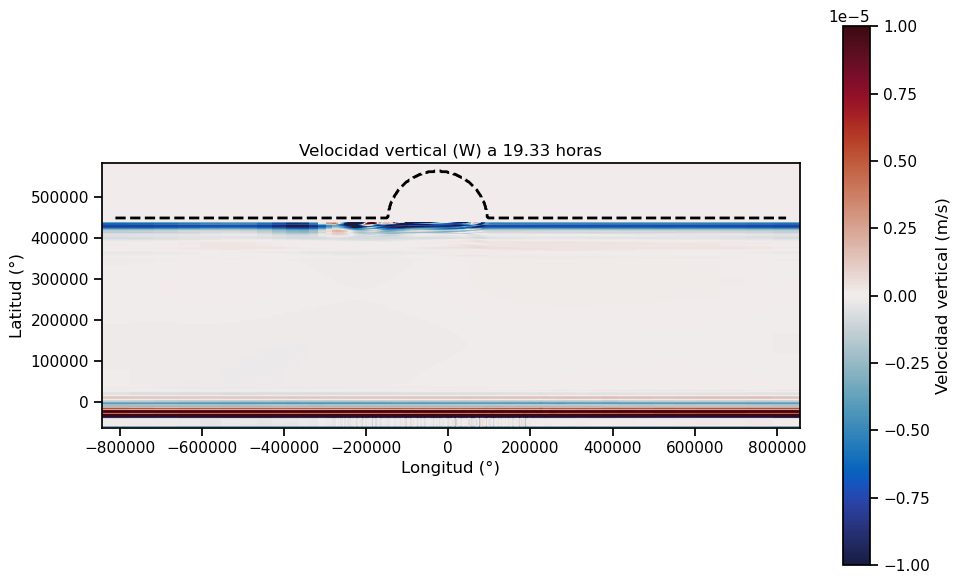

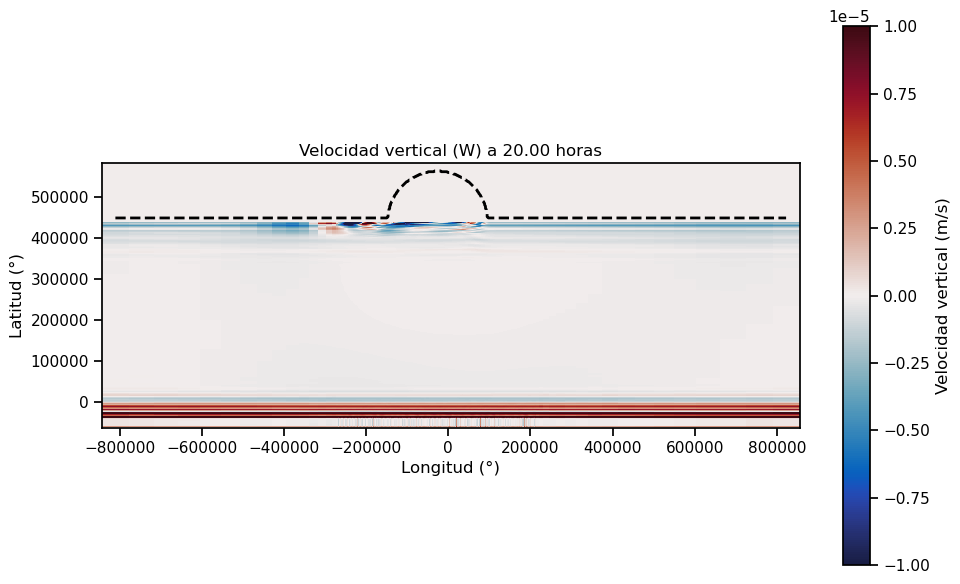

In [14]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
#for tt in range(0,len(time),2):
#    W = nc.variables['W'][tt,25,:,:]
#   plt.pcolormesh(XC[0,:],YC[:,0],W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
#    plt.colorbar()
#    plt.title(f'time={time[tt]/3600} h')
#    plt.show()

# Iterar sobre el tiempo en intervalos de 2
for tt in range(0, len(time), 2):
    W1 = nc.variables['W'][tt, 25, :, :]  # Velocidad vertical a la profundidad deseada con bahia
    W2 = nc2.variables['W'][tt, 25, :, :]  #Sin bahia
    W = W1#-W2
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
    mesh = ax.pcolormesh(XC[0, :], YC[:, 0], W, vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    fig.colorbar(mesh, ax=ax, label='Velocidad vertical (m/s)')  # Etiqueta de la barra de colores
    ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
    ax.set_title(f'Velocidad vertical (W) a {time[tt]/3600:.2f} horas')
    ax.set_xlabel('Longitud (°)')
    ax.set_ylabel('Latitud (°)')
    ax.set_aspect(1)  # Proporciones iguales en x e y
    plt.tight_layout()
    plt.show()

In [15]:
W

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.09877699e-06,  2.97760010e-06,  2.87620891e-06, ...,
         3.02627246e-06,  3.14967173e-06,  3.05949829e-06],
       [ 3.52647587e-07,  2.97148274e-07,  2.09582123e-07, ...,
         1.80394363e-07,  3.30713304e-07,  2.80401663e-07],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [16]:
Eta1 = nc.variables['Eta'][:, :, :]
Eta_NB= nc2.variables['Eta'][:,:,:]
Eta= Eta1- Eta_NB
max_E=np.max(np.max(Eta))
print(max_E)
min_E=np.min(np.min(Eta))
print(min_E)

0.05803082859376626
-0.058864376902331164


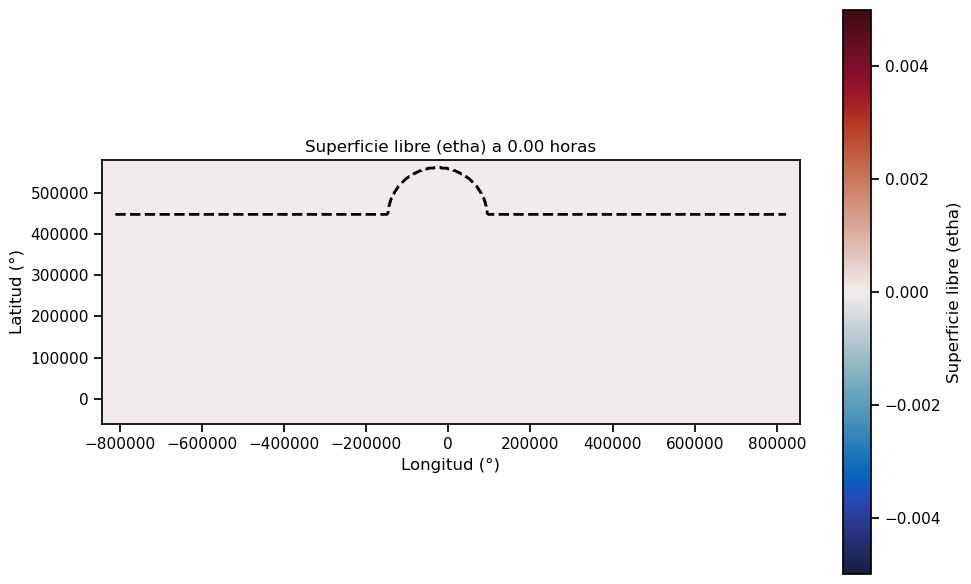

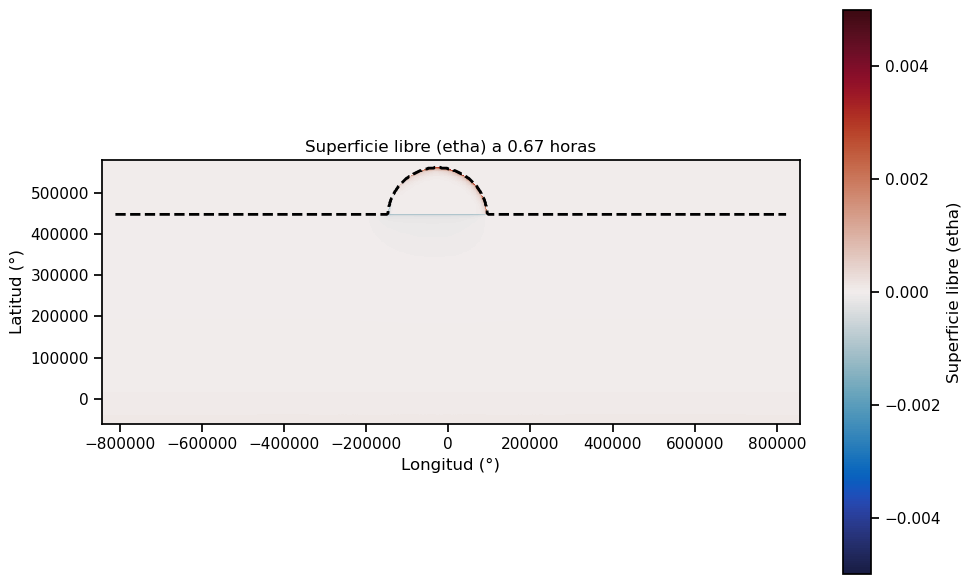

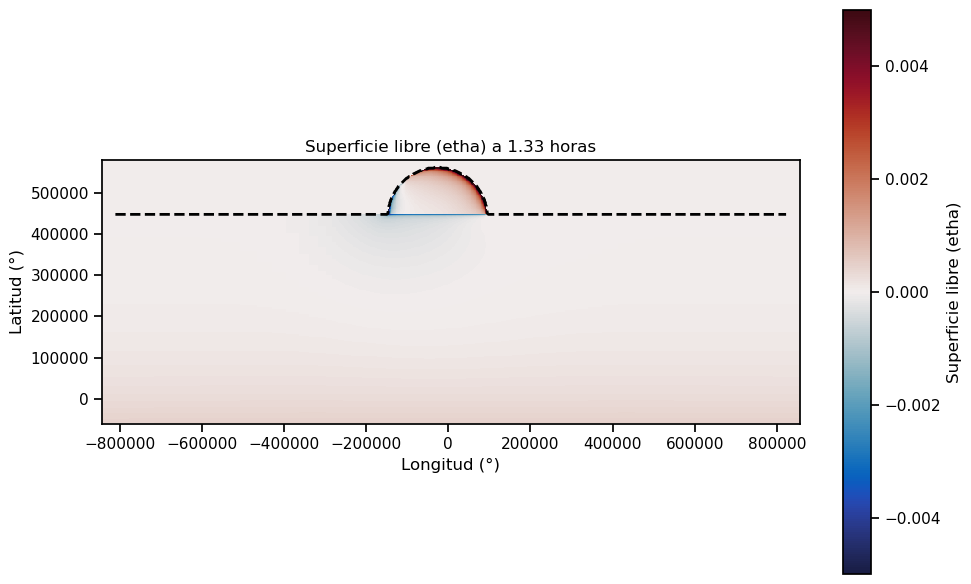

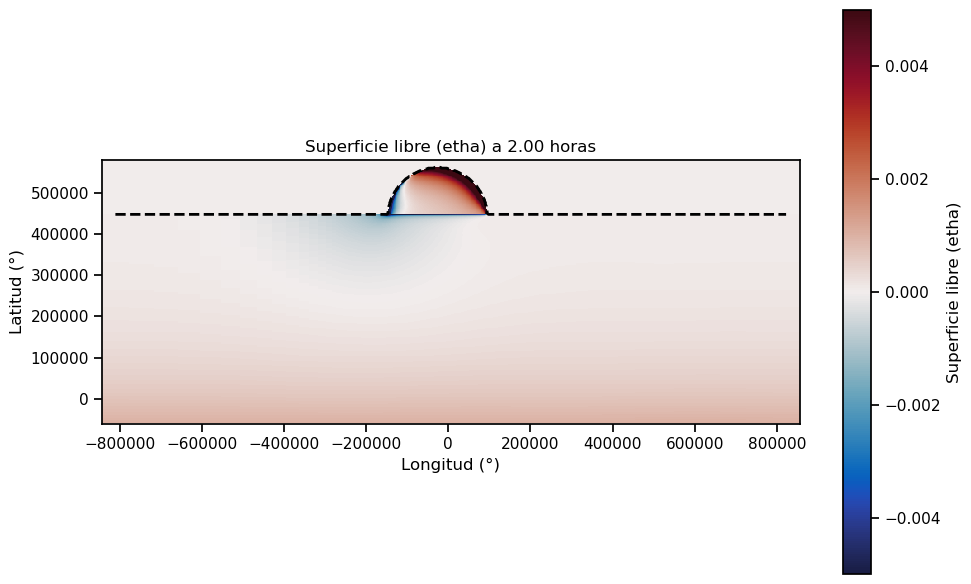

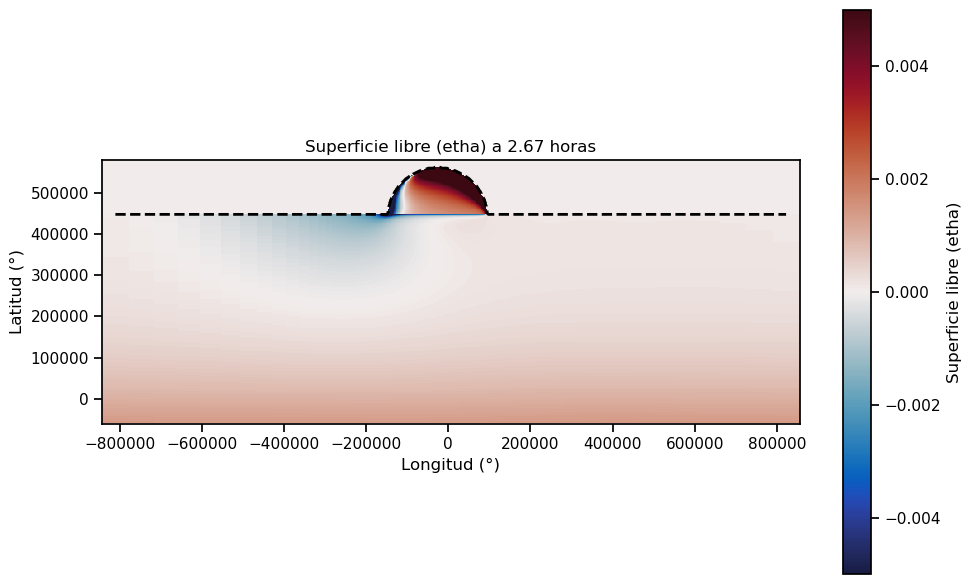

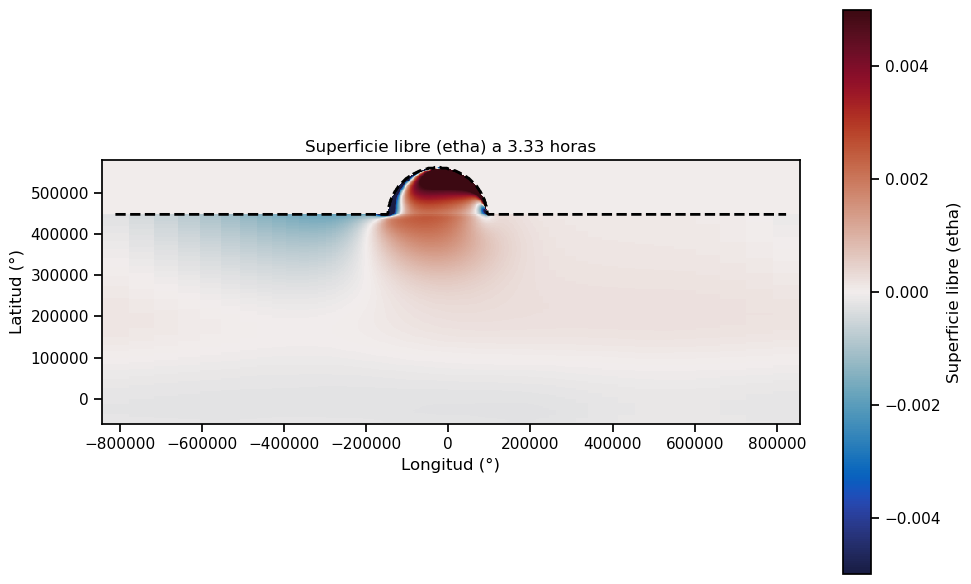

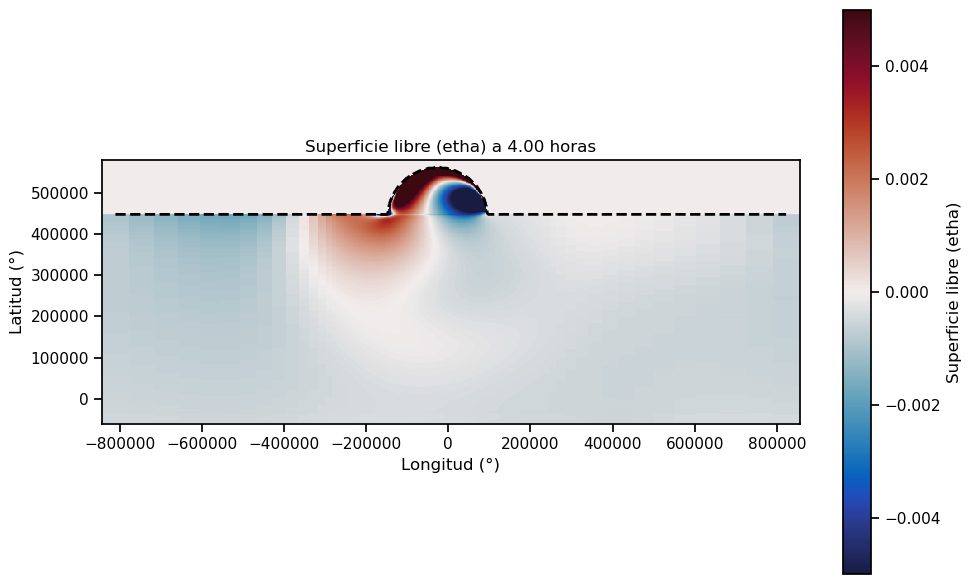

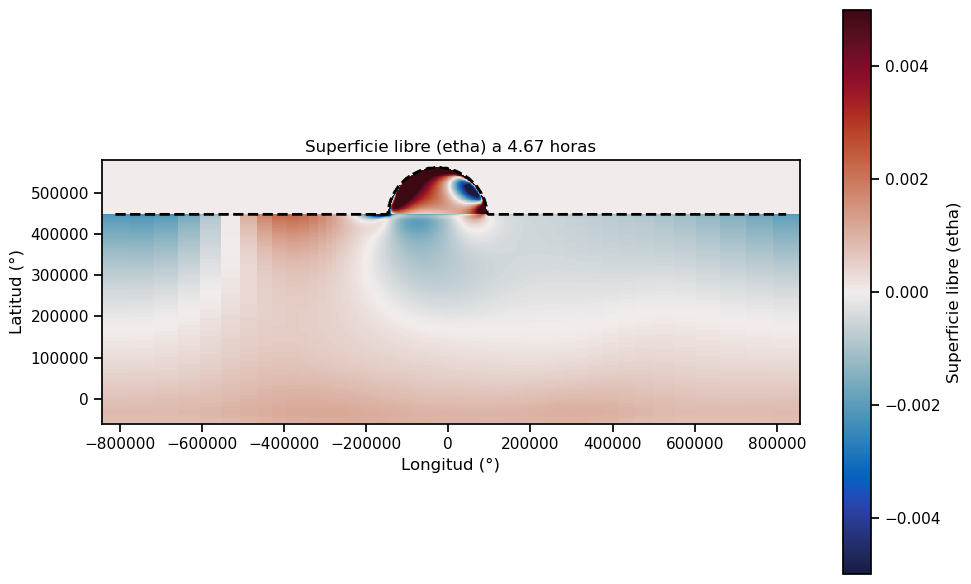

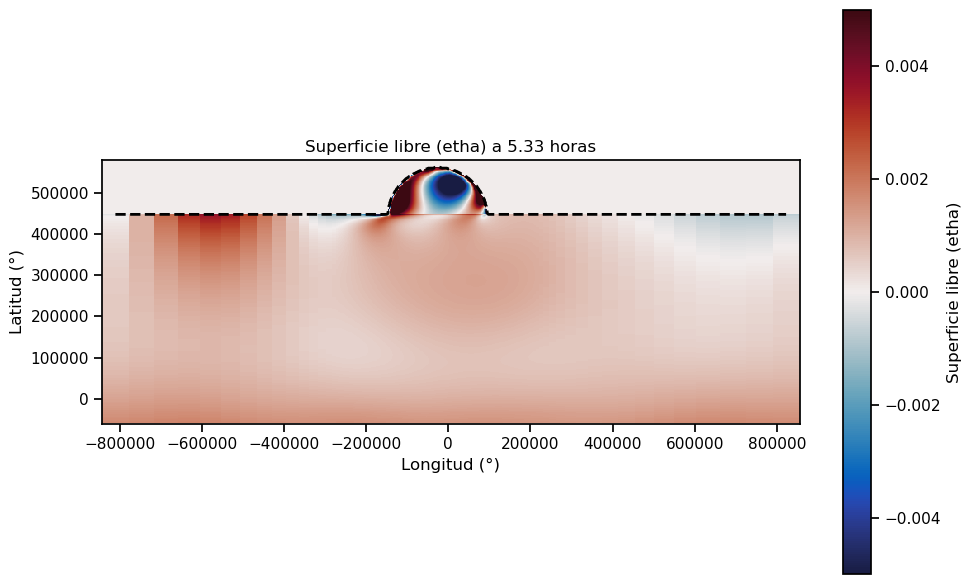

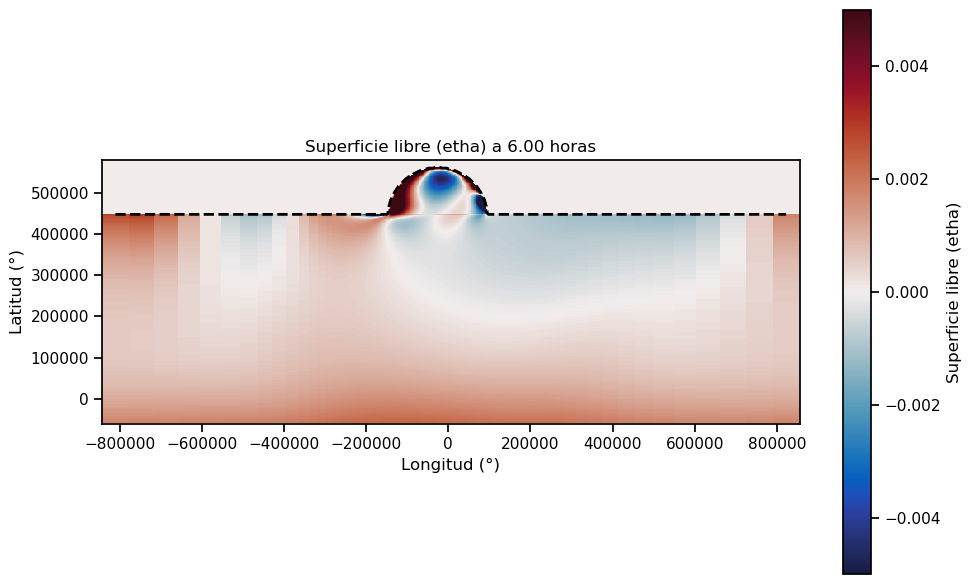

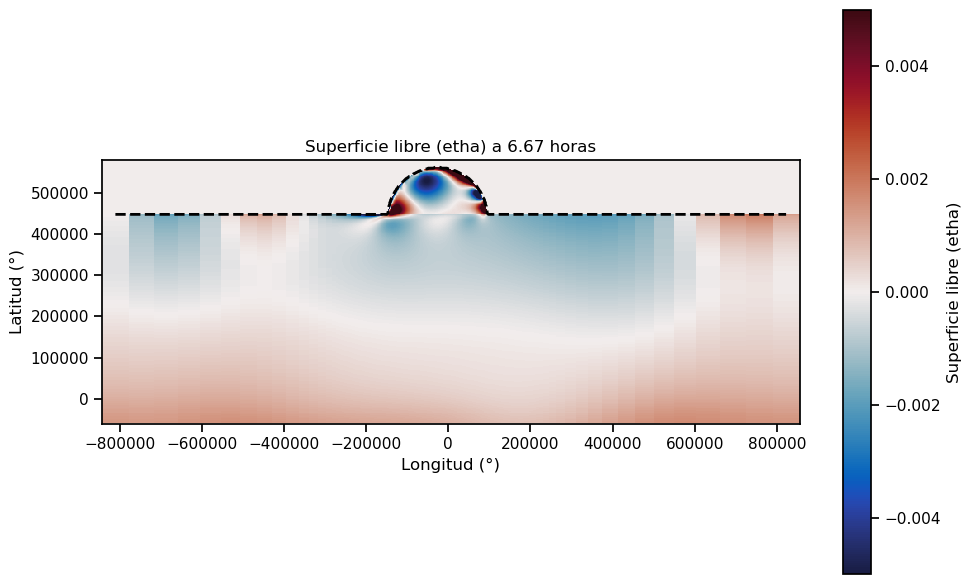

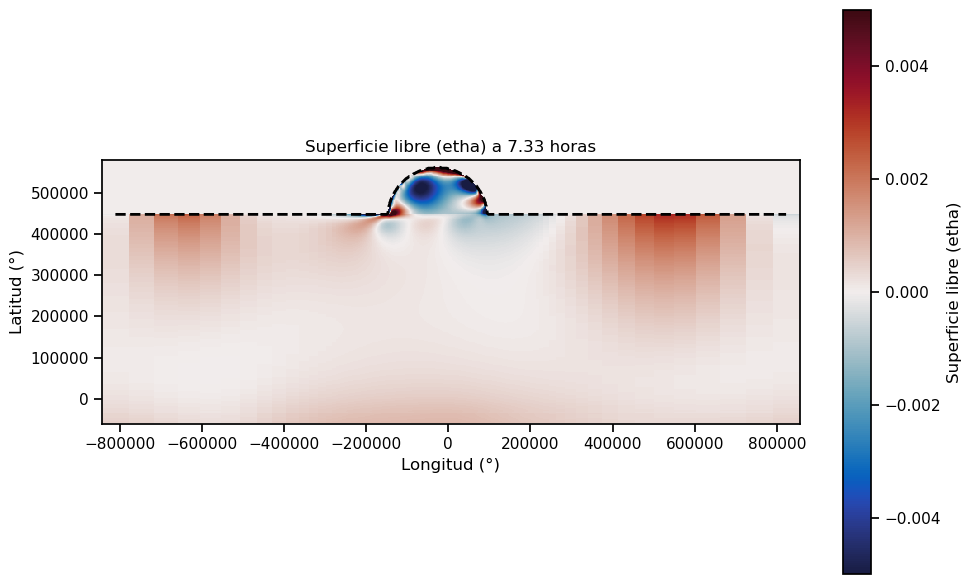

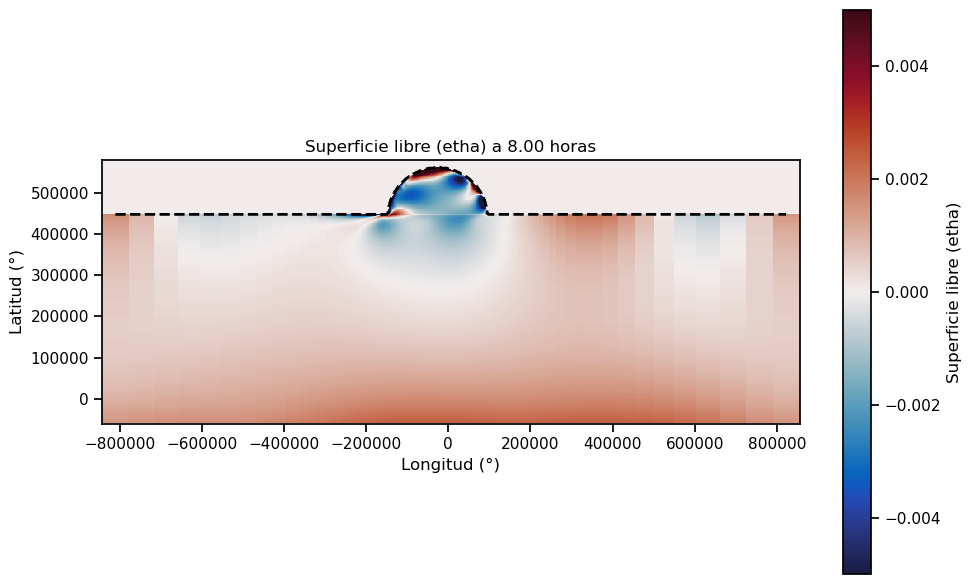

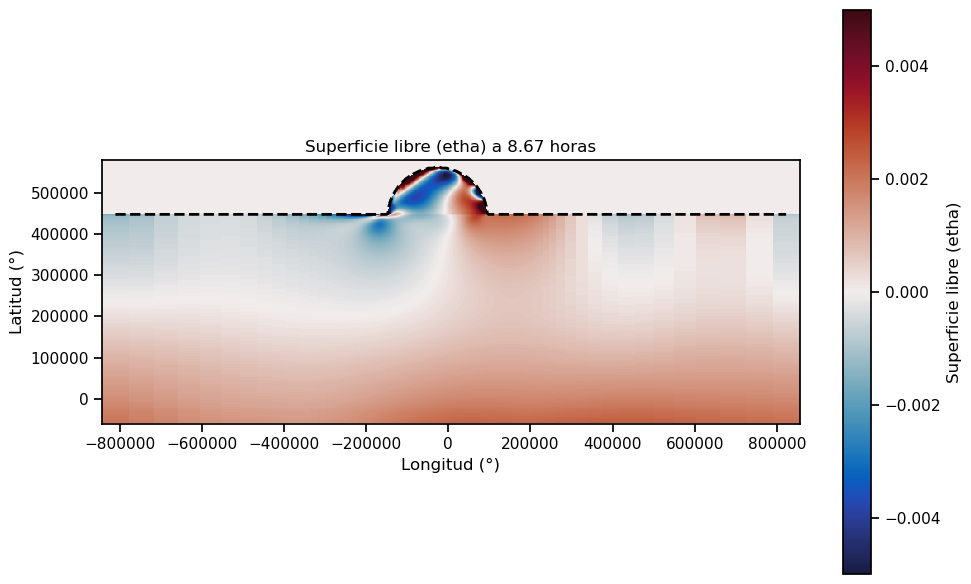

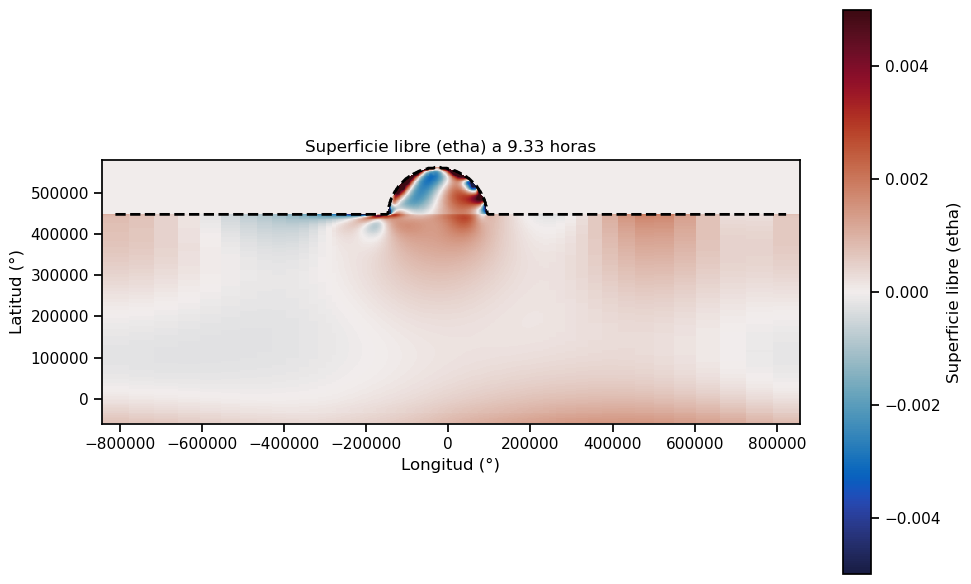

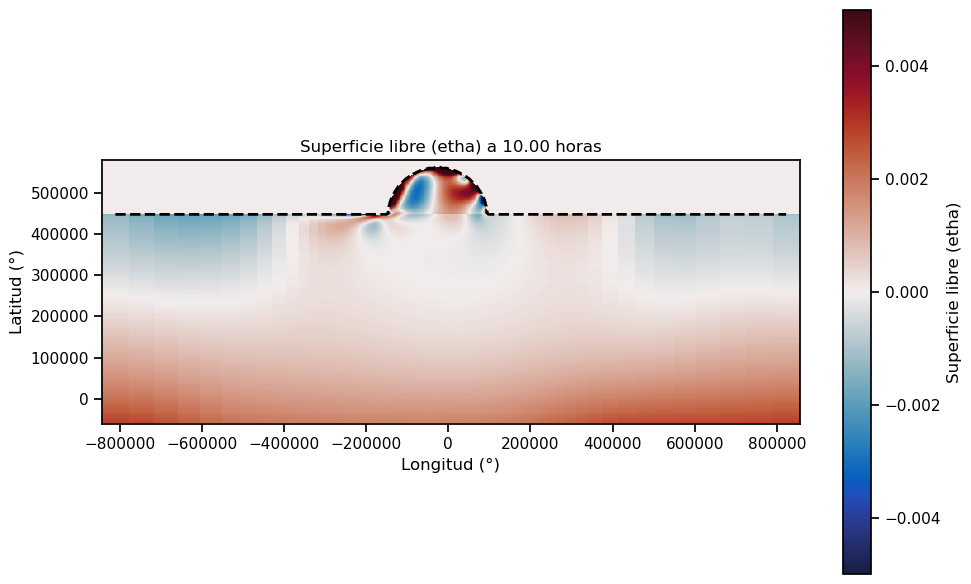

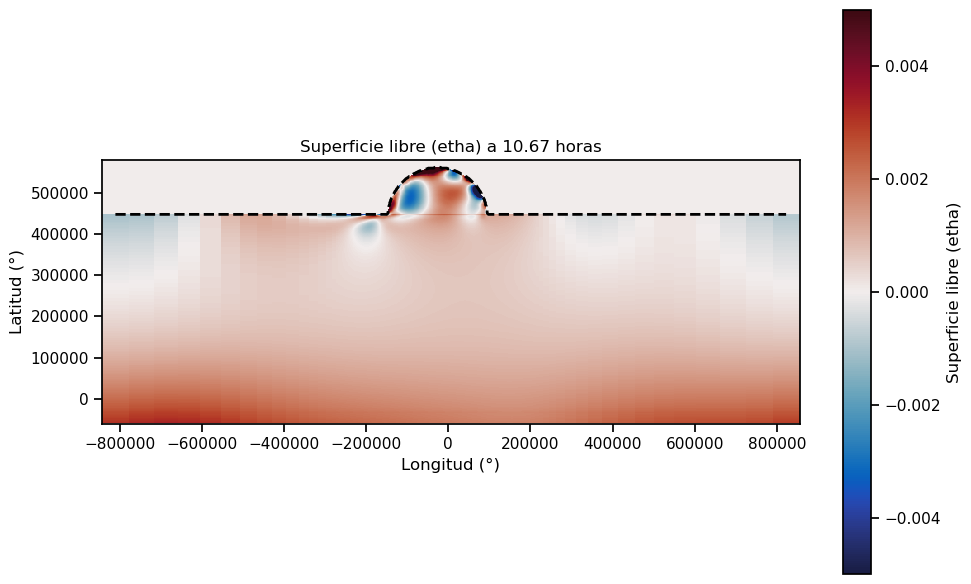

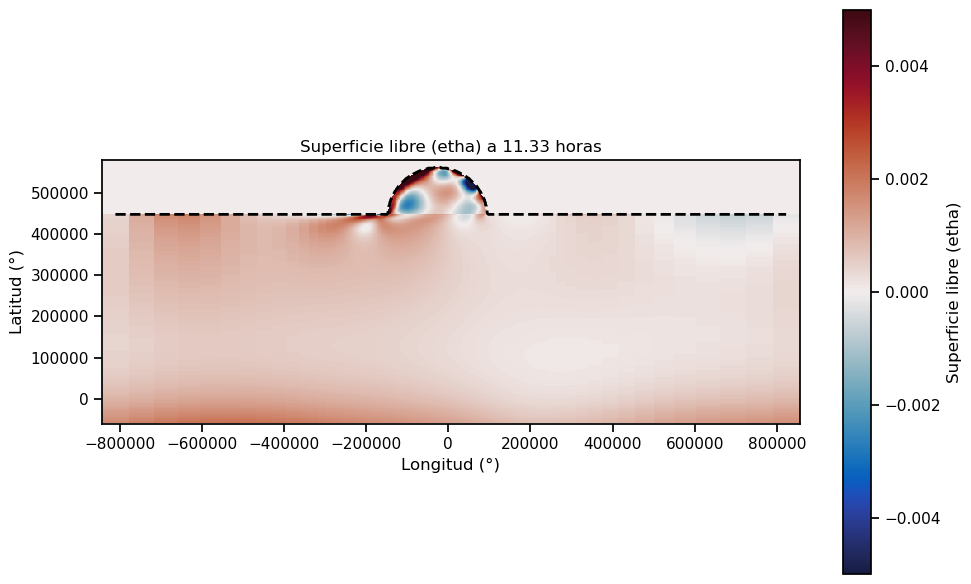

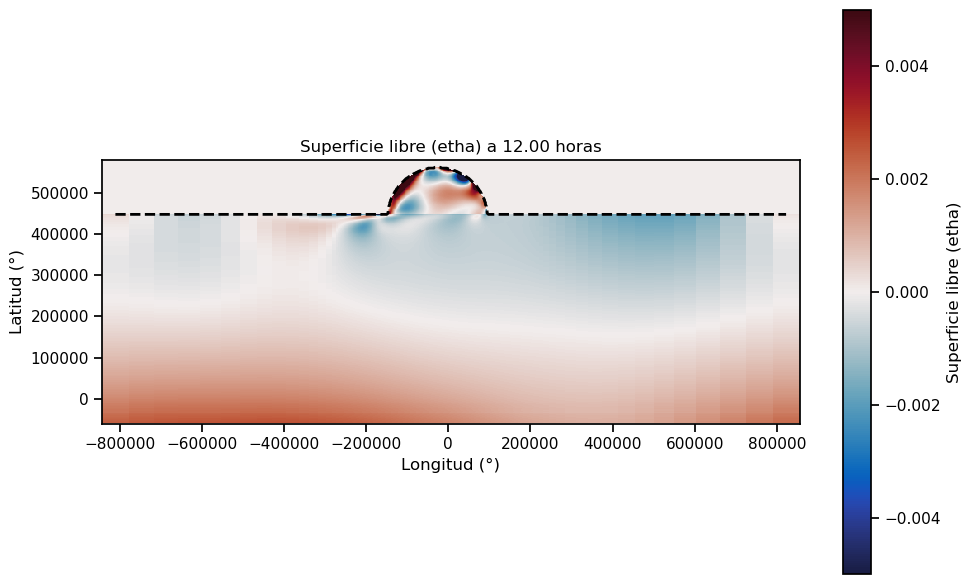

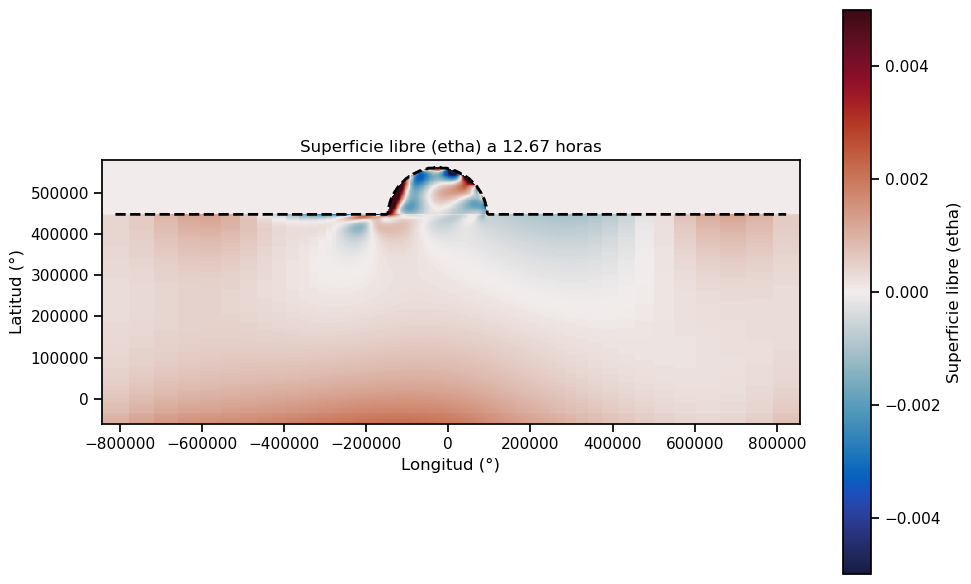

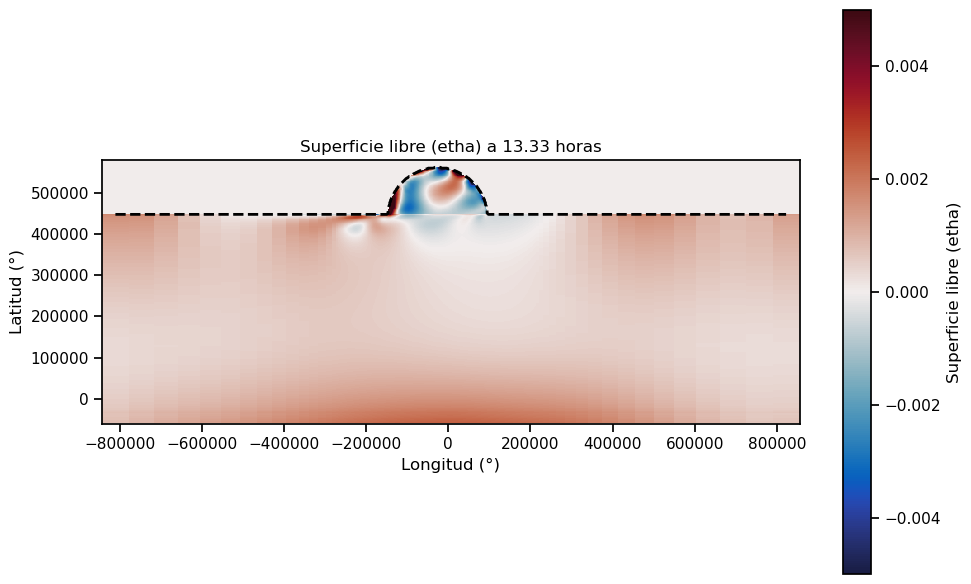

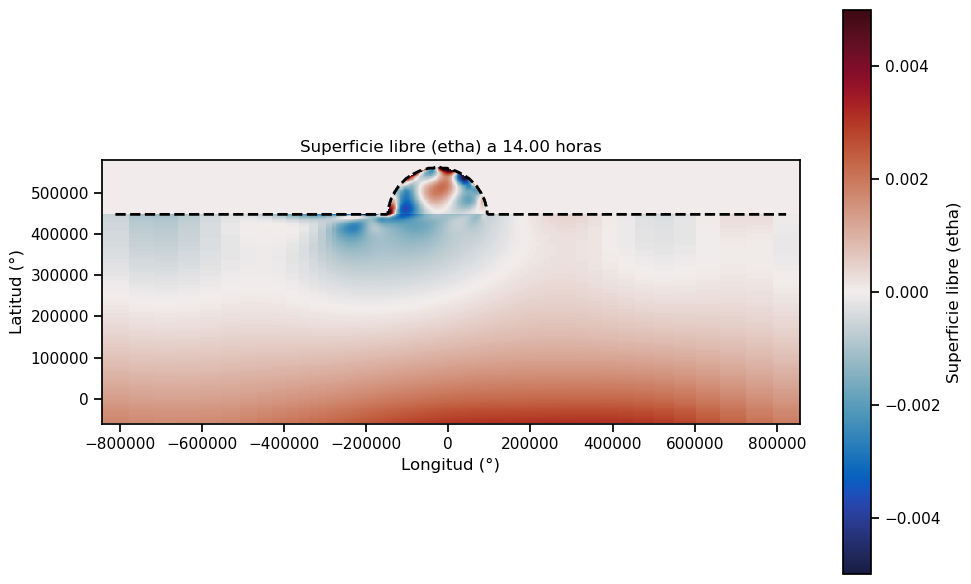

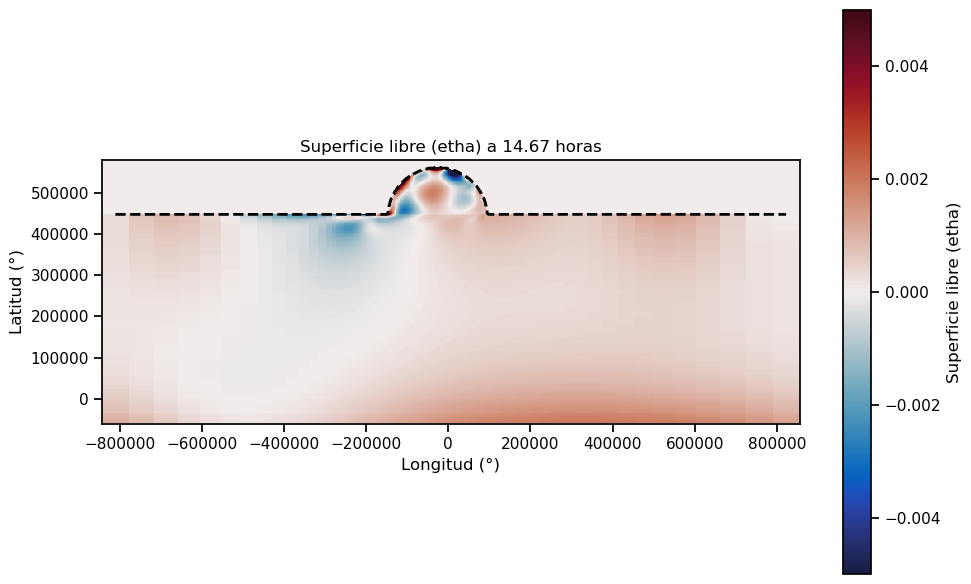

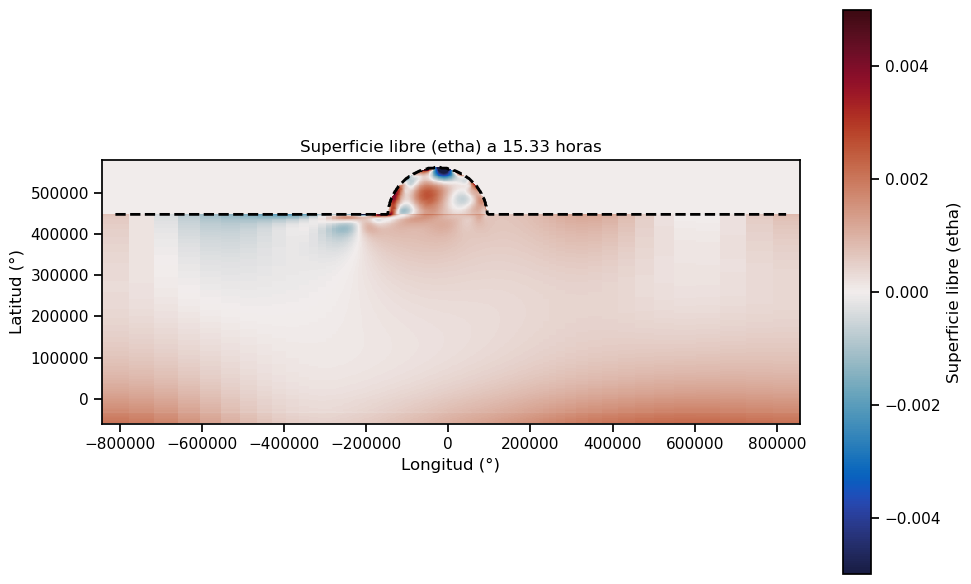

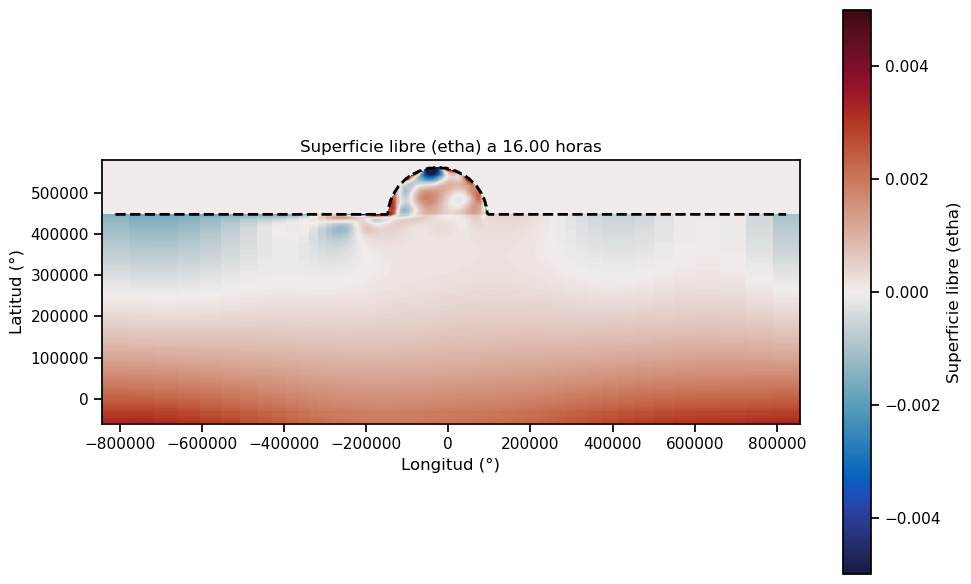

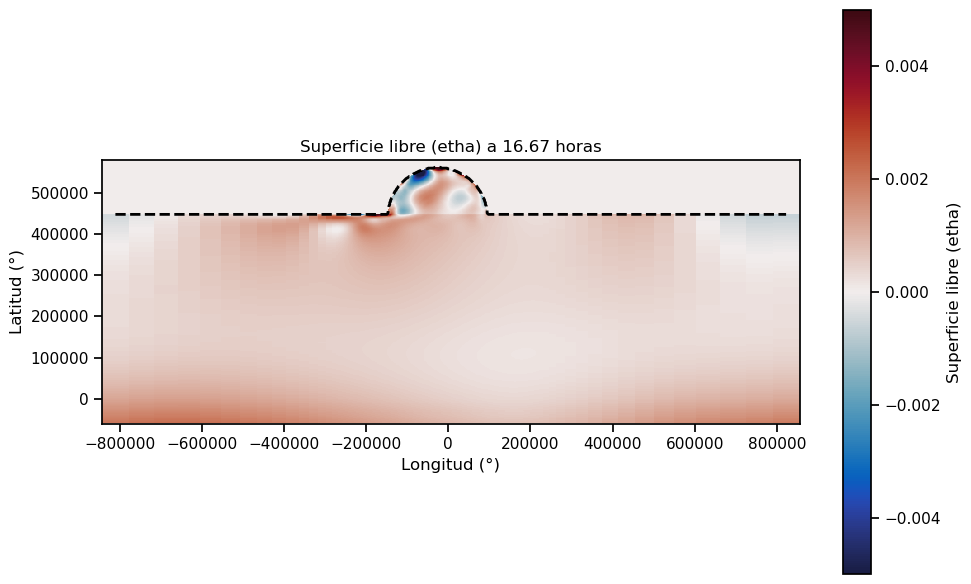

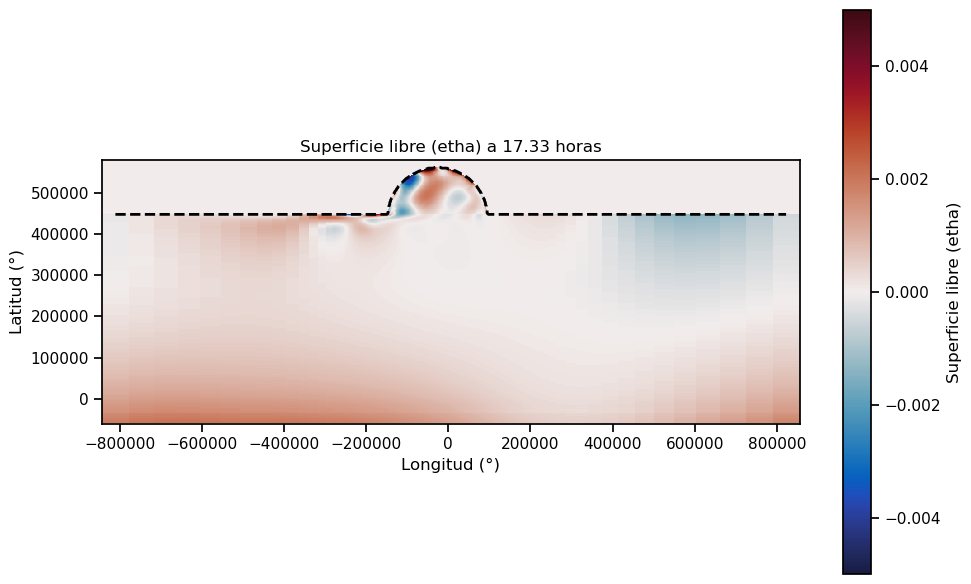

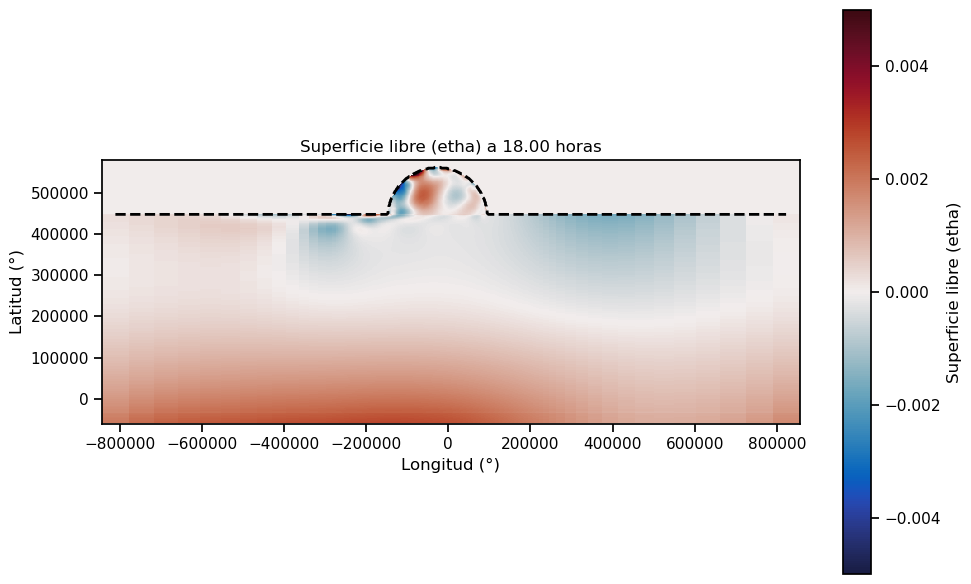

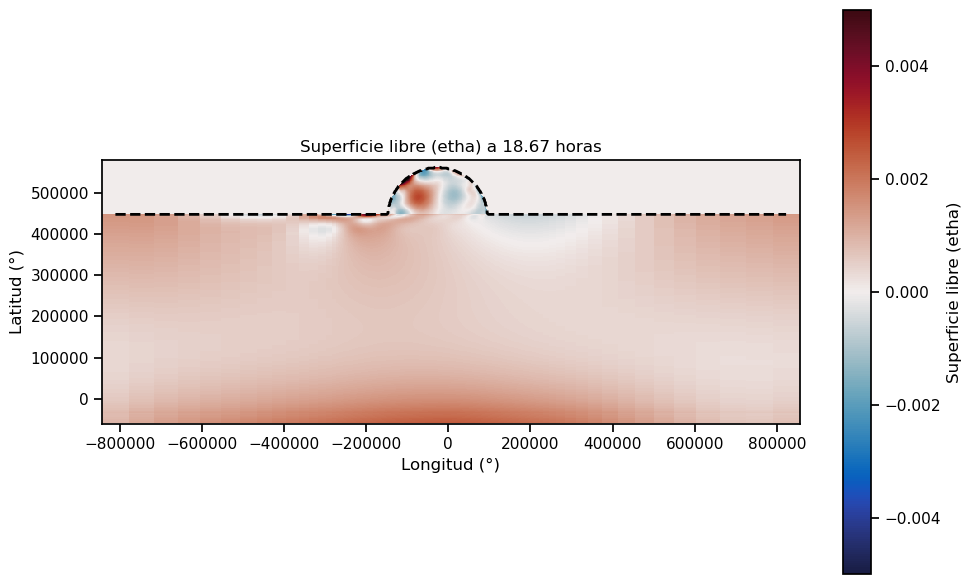

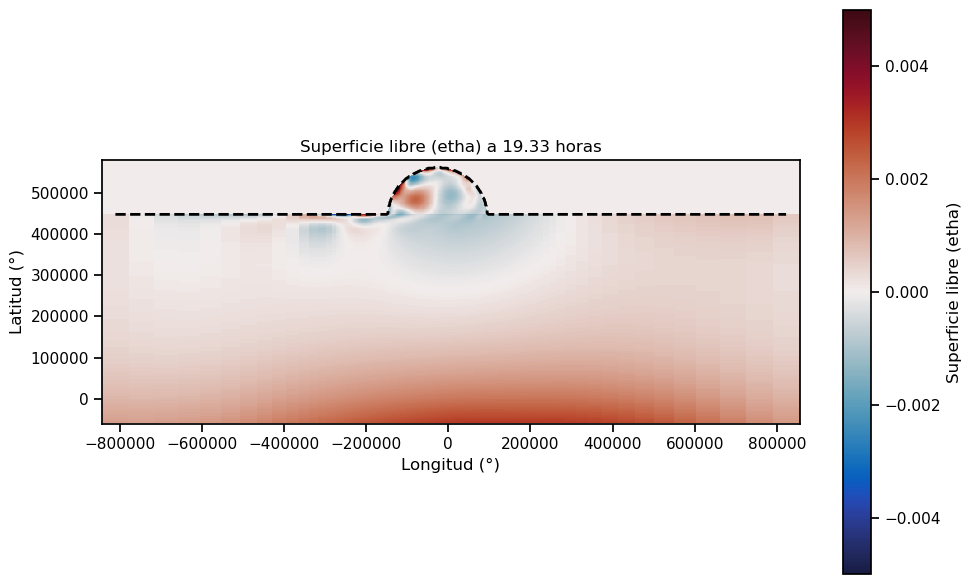

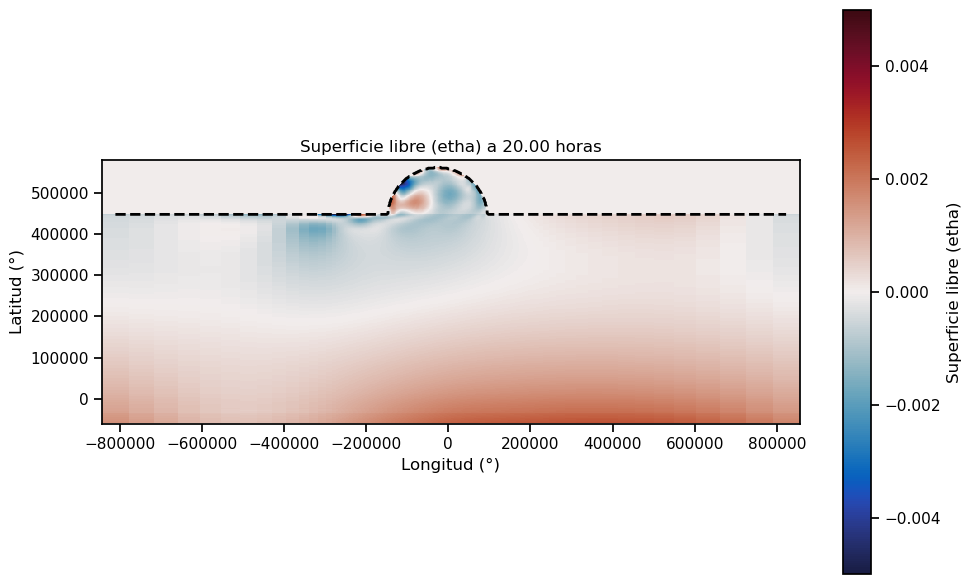

In [17]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
#for tt in range(0,len(time),2):
#    W = nc.variables['W'][tt,25,:,:]
#   plt.pcolormesh(XC[0,:],YC[:,0],W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
#    plt.colorbar()
#    plt.title(f'time={time[tt]/3600} h')
#    plt.show()

# Iterar sobre el tiempo en intervalos de 2
for tt in range(0, len(time), 2):
    Eta1 = nc.variables['Eta'][tt, :, :]# Velocidad vertical a la profundidad deseada
    Eta2 = nc2.variables['Eta'][tt, :, :]
    Eta = Eta1-Eta2
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
    mesh = ax.pcolormesh(XC[0, :], YC[:, 0], Eta, vmin=-0.005, vmax=0.005, cmap=cmo.cm.balance)
    fig.colorbar(mesh, ax=ax, label='Superficie libre (etha)')  # Etiqueta de la barra de colores
    ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
    ax.set_title(f'Superficie libre (etha) a {time[tt]/3600:.2f} horas')
    ax.set_xlabel('Longitud (°)')
    ax.set_ylabel('Latitud (°)')
    ax.set_aspect(1)  # Proporciones iguales en x e y
    plt.tight_layout()
    plt.show()

In [18]:
nc.variables['T'][:]

array([    0.,  1200.,  2400.,  3600.,  4800.,  6000.,  7200.,  8400.,
        9600., 10800., 12000., 13200., 14400., 15600., 16800., 18000.,
       19200., 20400., 21600., 22800., 24000., 25200., 26400., 27600.,
       28800., 30000., 31200., 32400., 33600., 34800., 36000., 37200.,
       38400., 39600., 40800., 42000., 43200., 44400., 45600., 46800.,
       48000., 49200., 50400., 51600., 52800., 54000., 55200., 56400.,
       57600., 58800., 60000., 61200., 62400., 63600., 64800., 66000.,
       67200., 68400., 69600., 70800., 72000.])

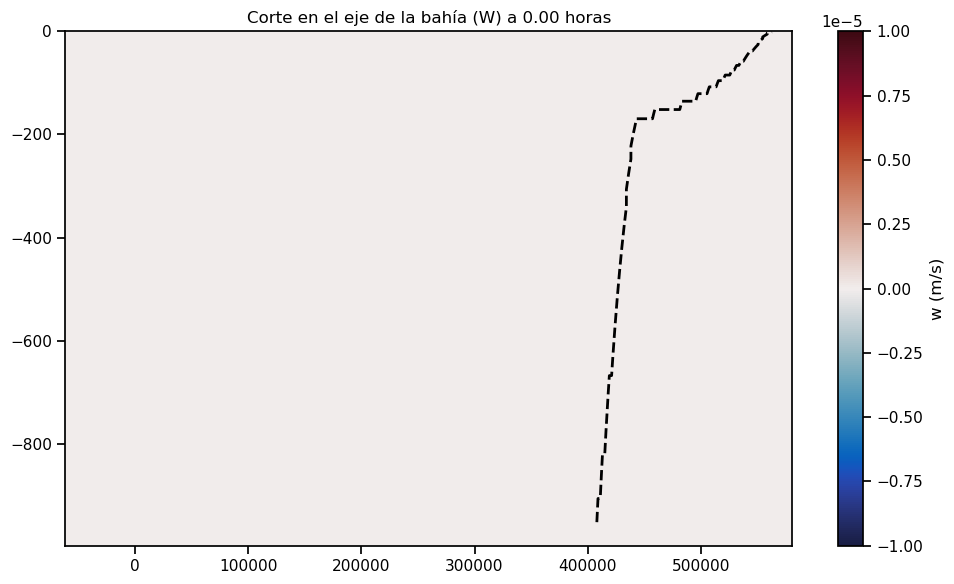

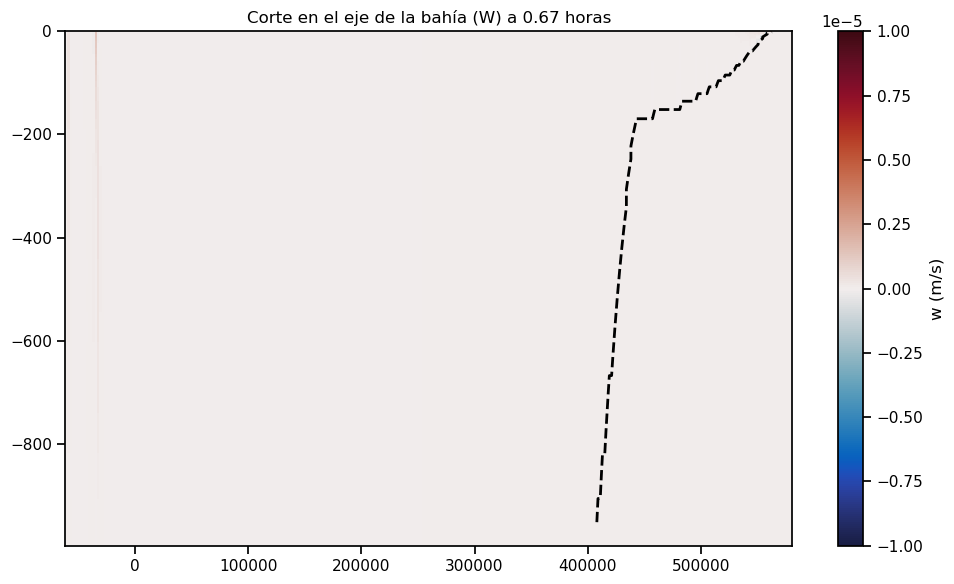

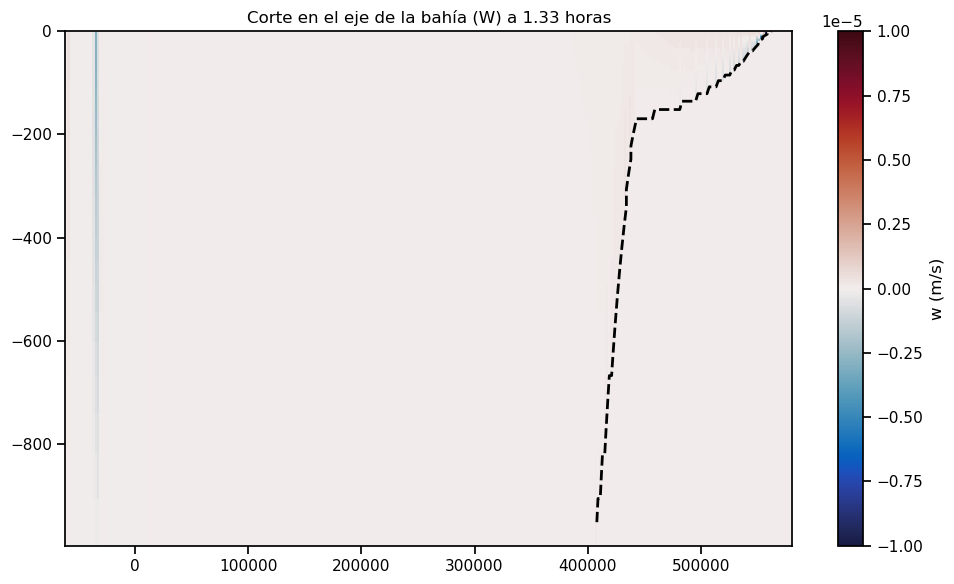

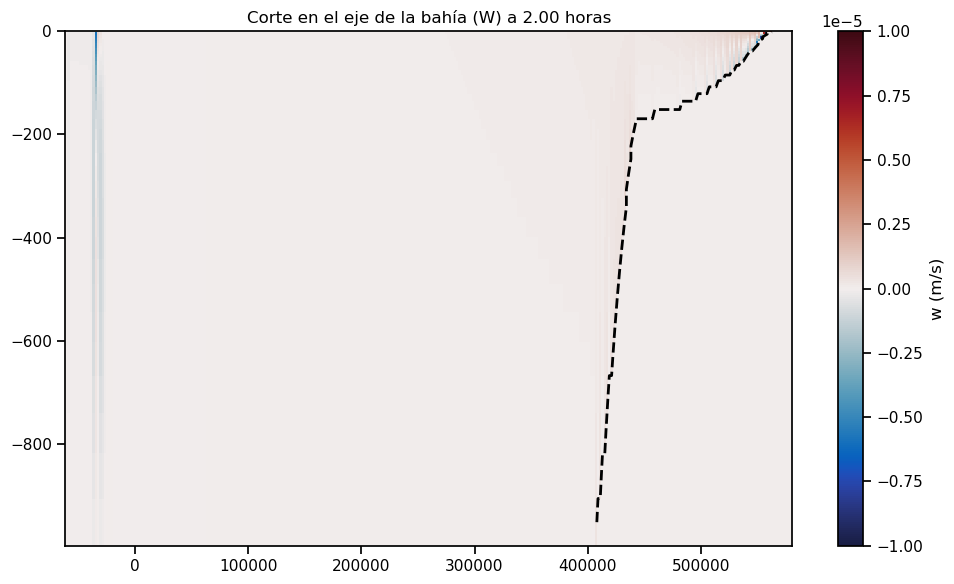

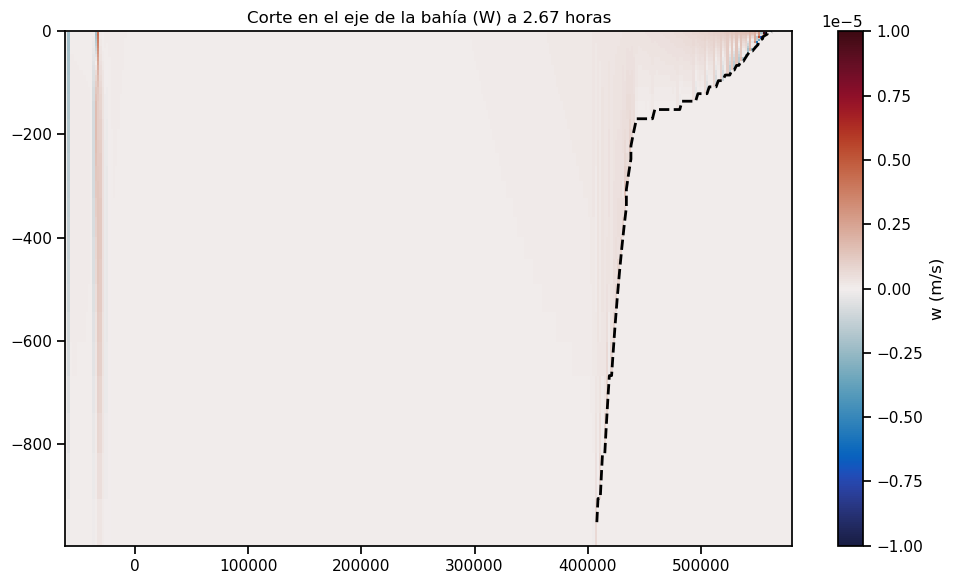

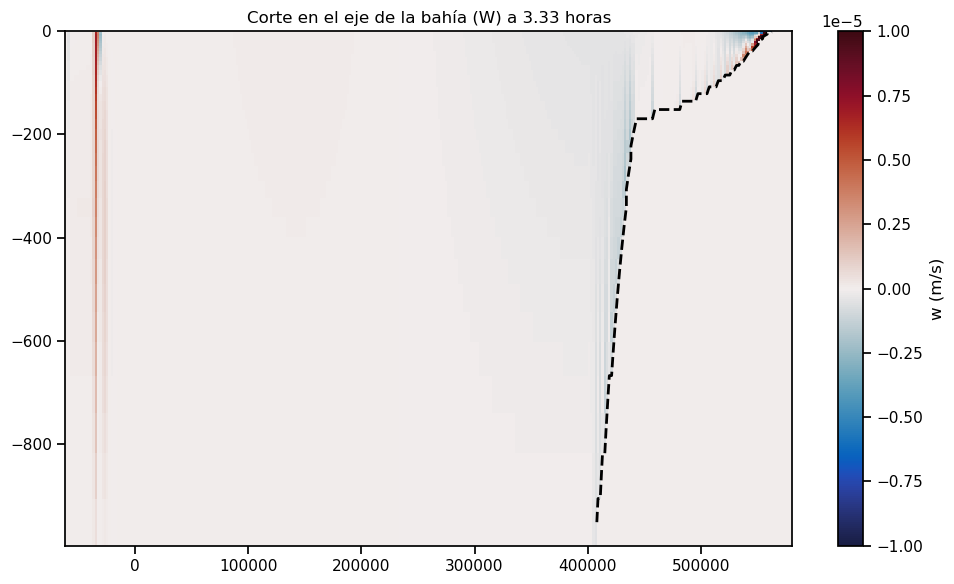

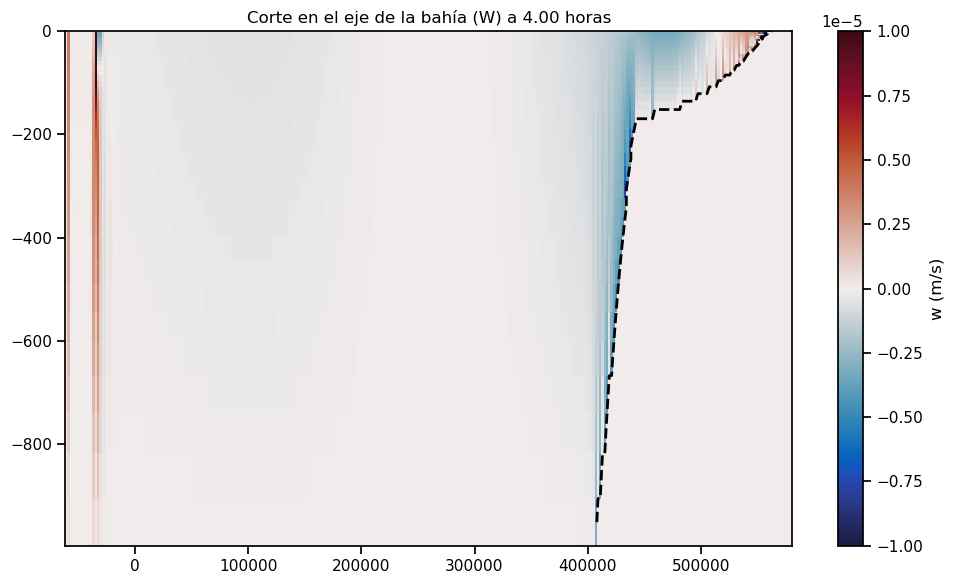

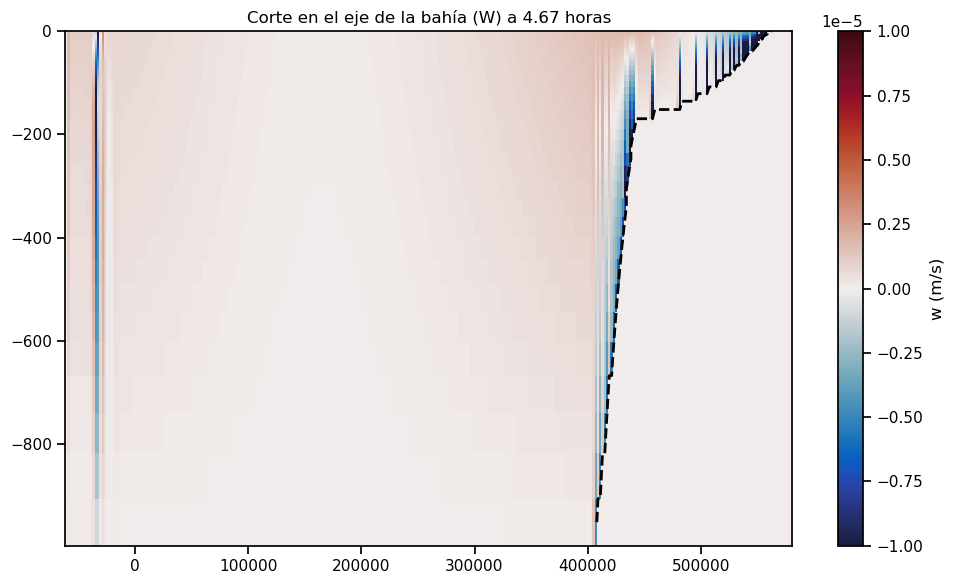

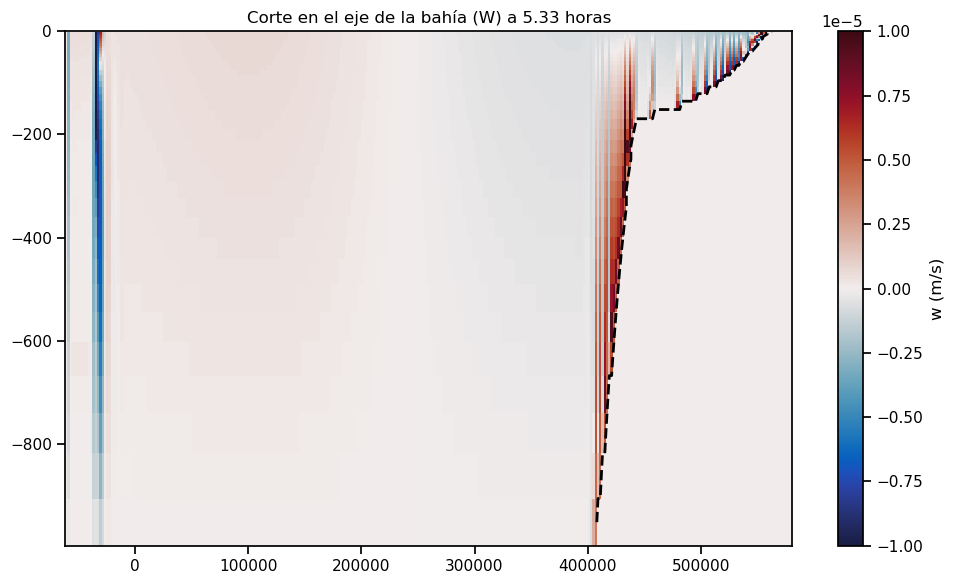

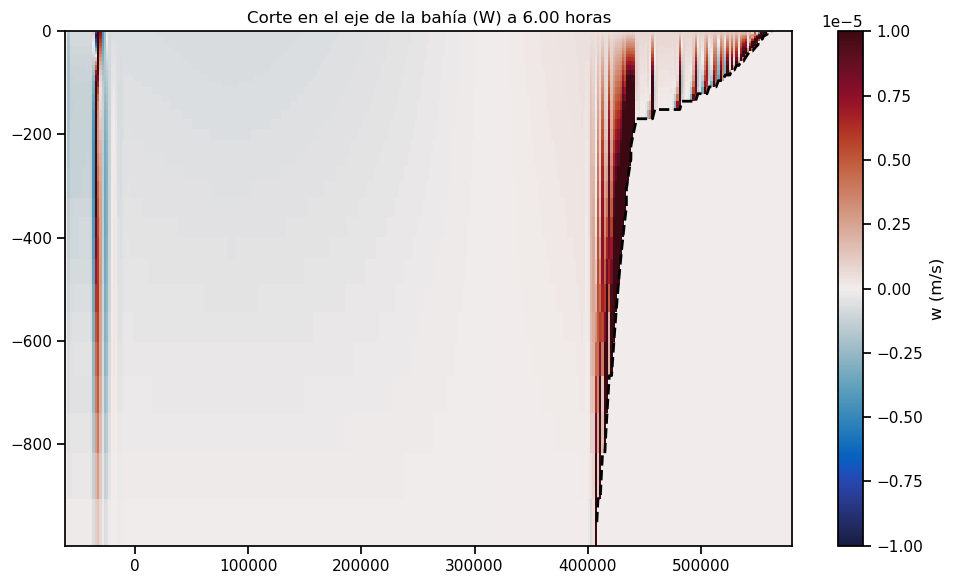

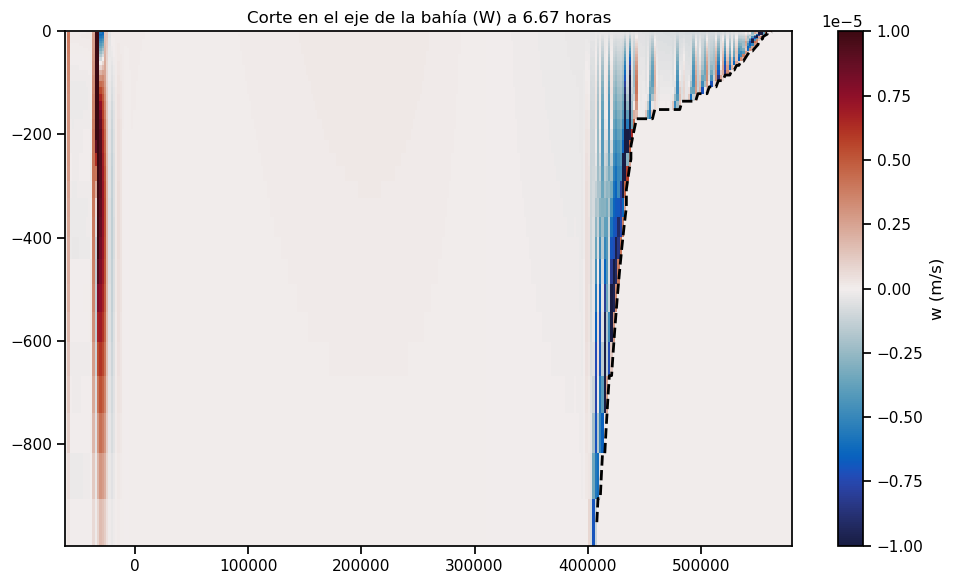

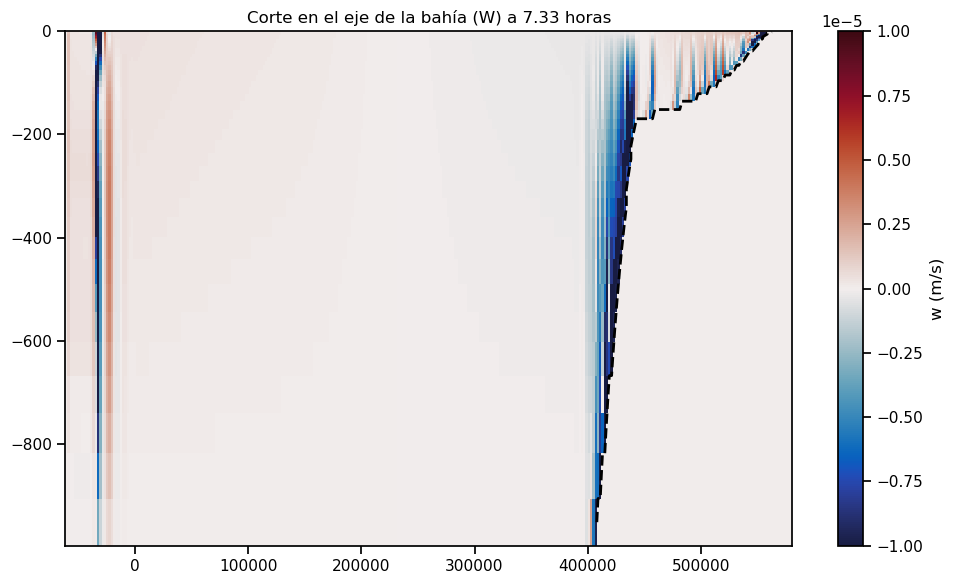

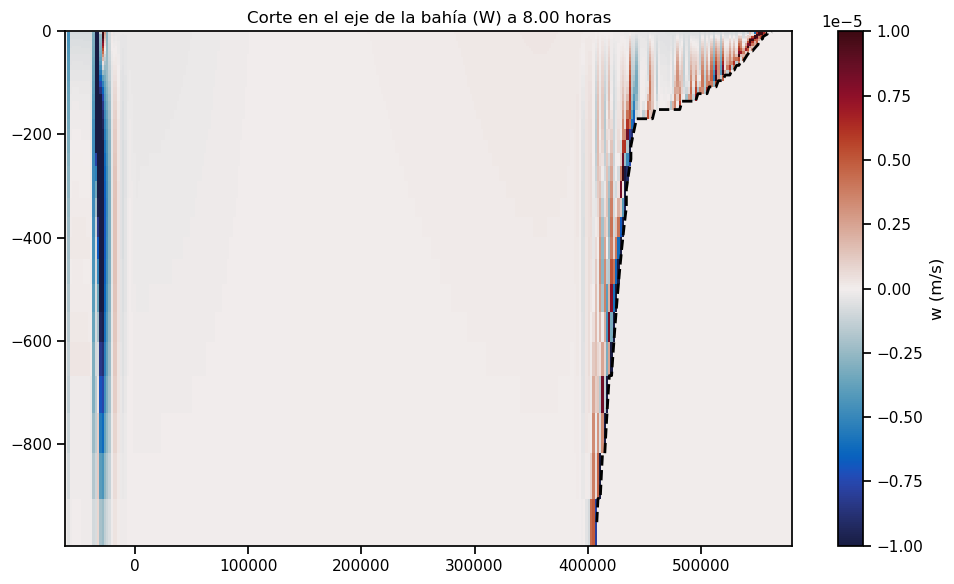

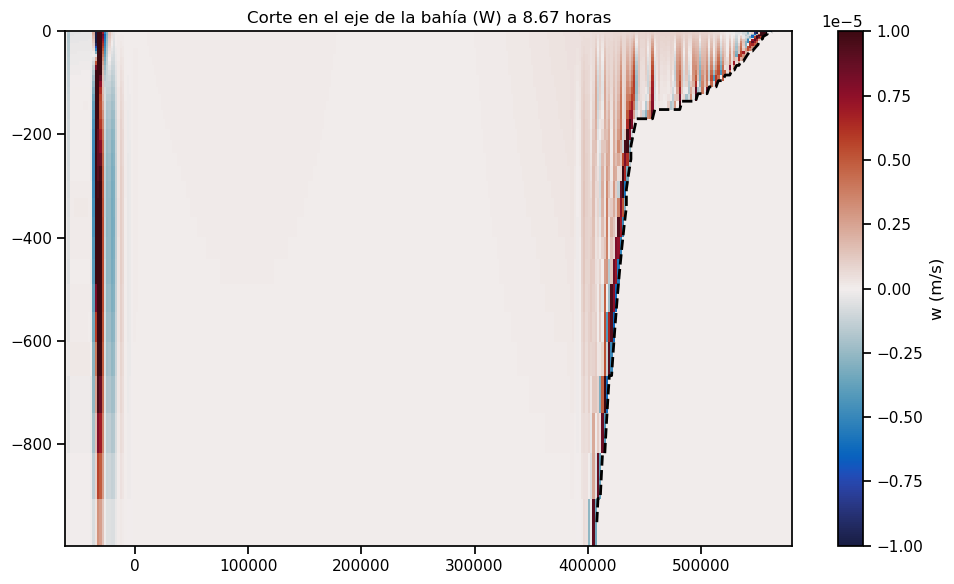

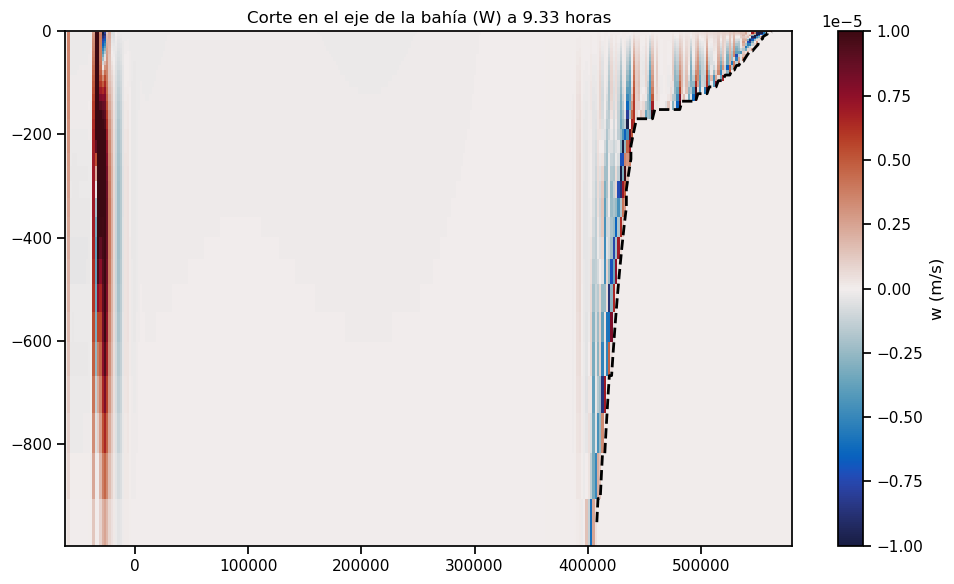

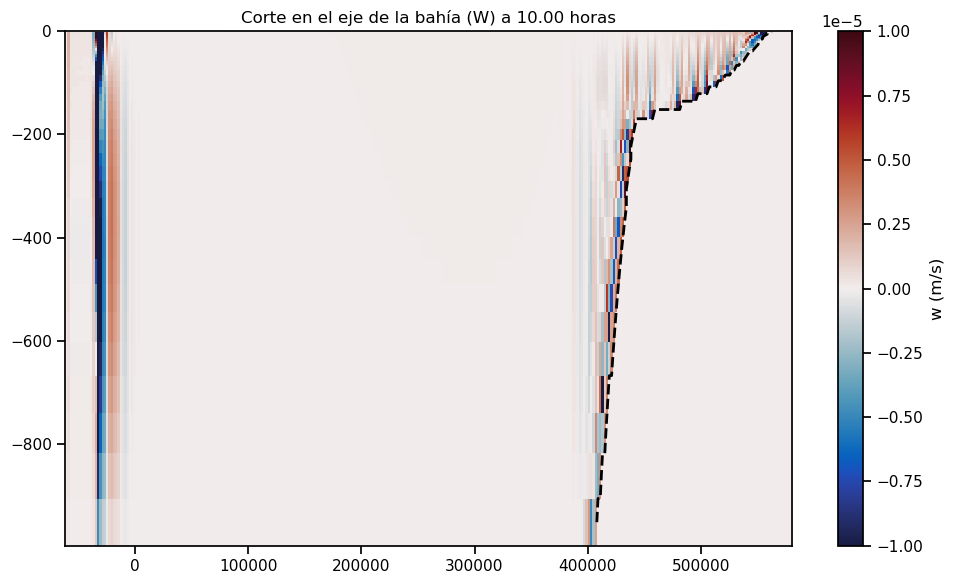

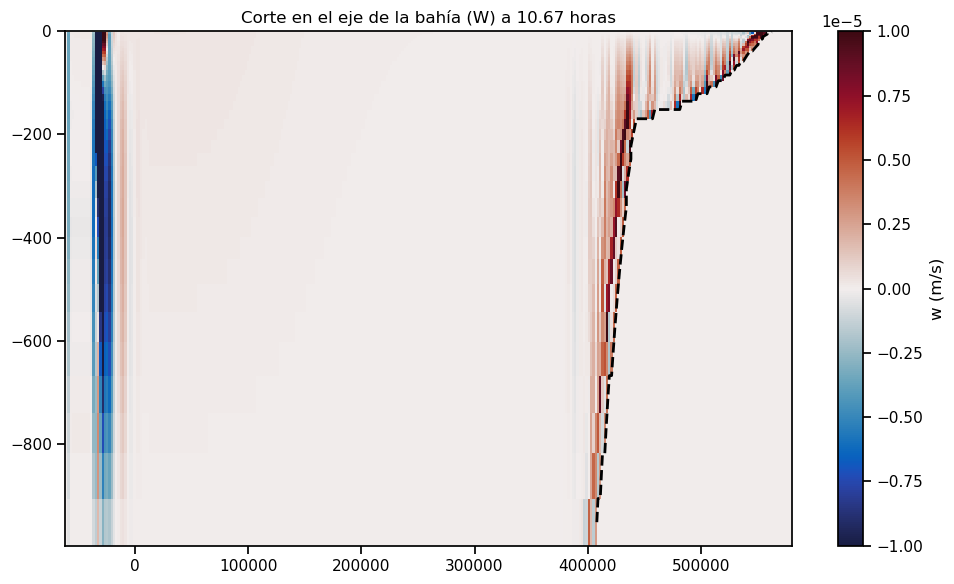

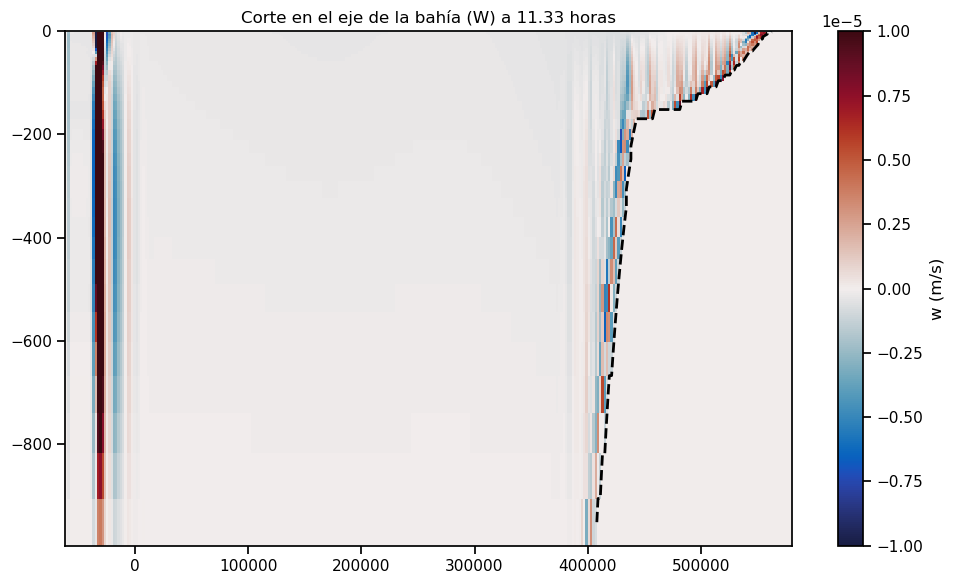

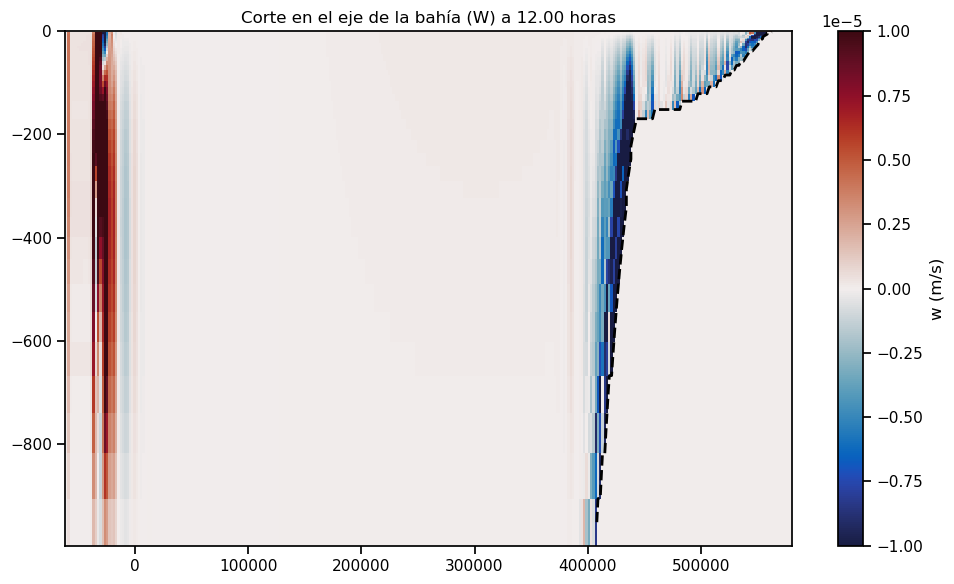

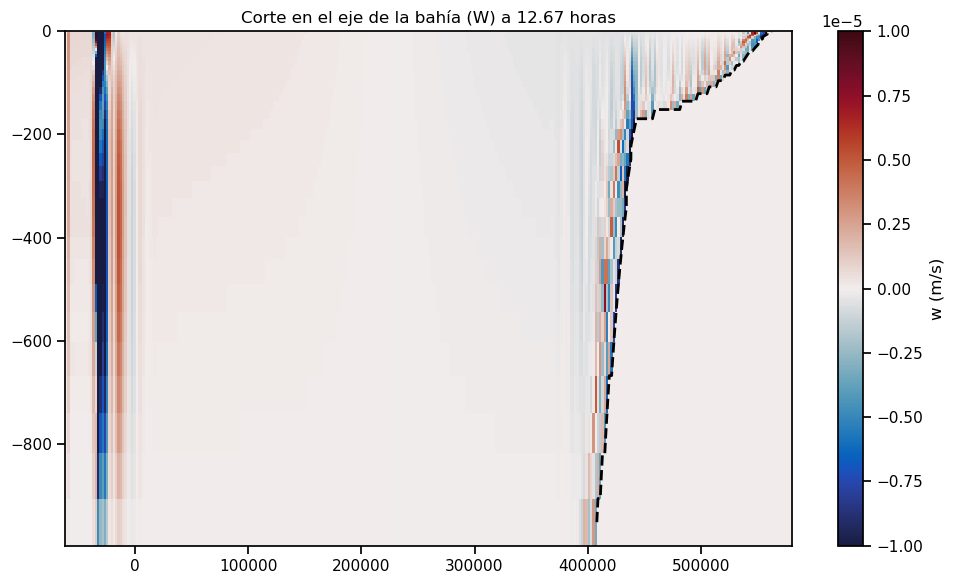

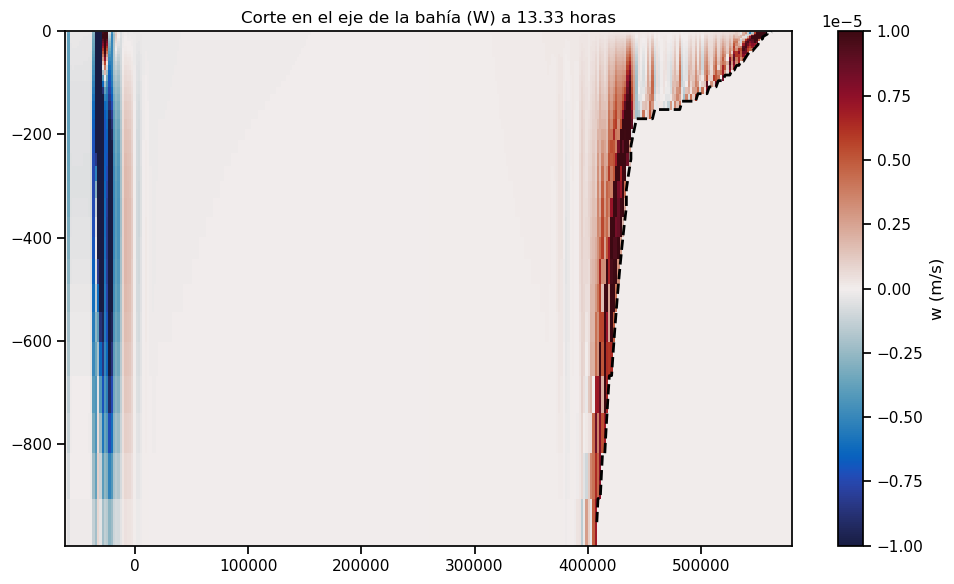

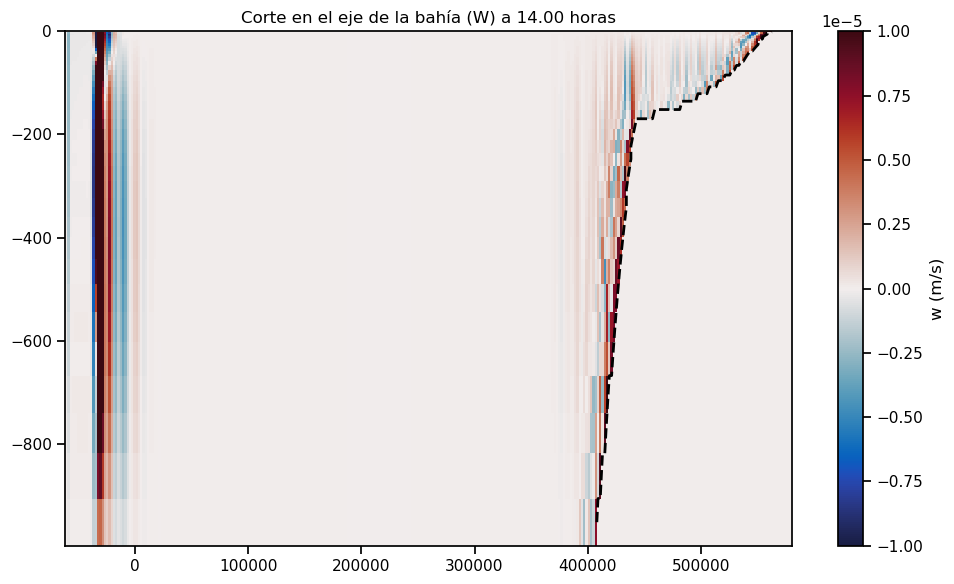

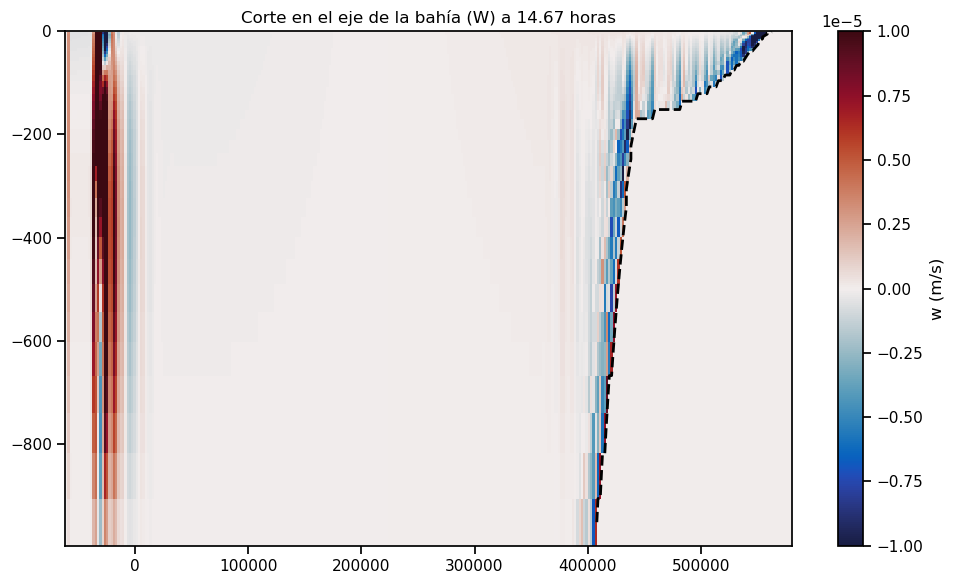

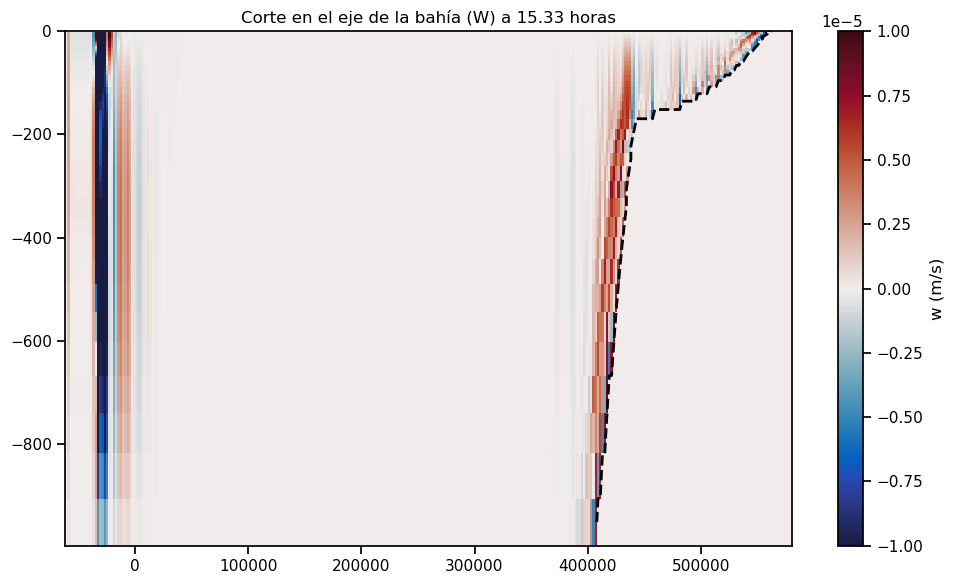

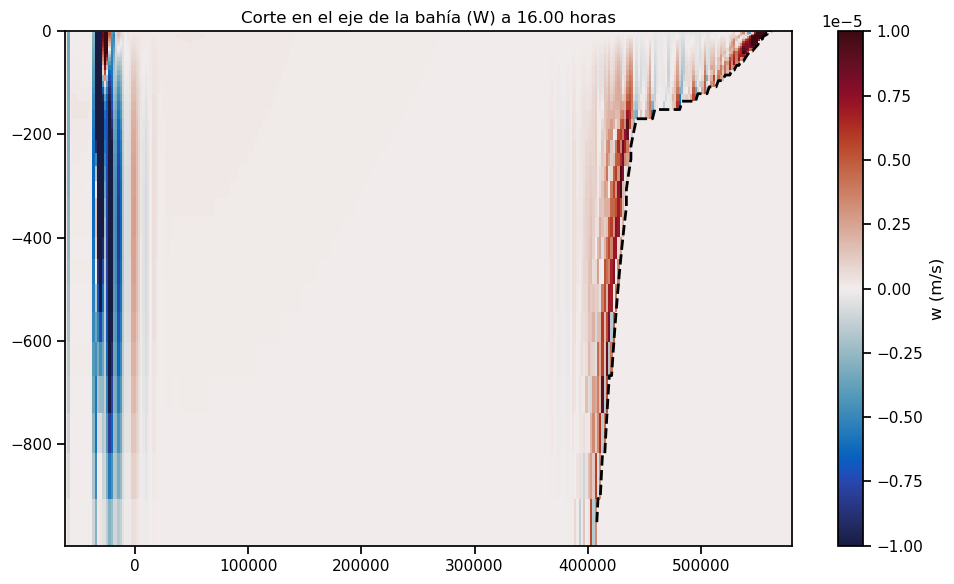

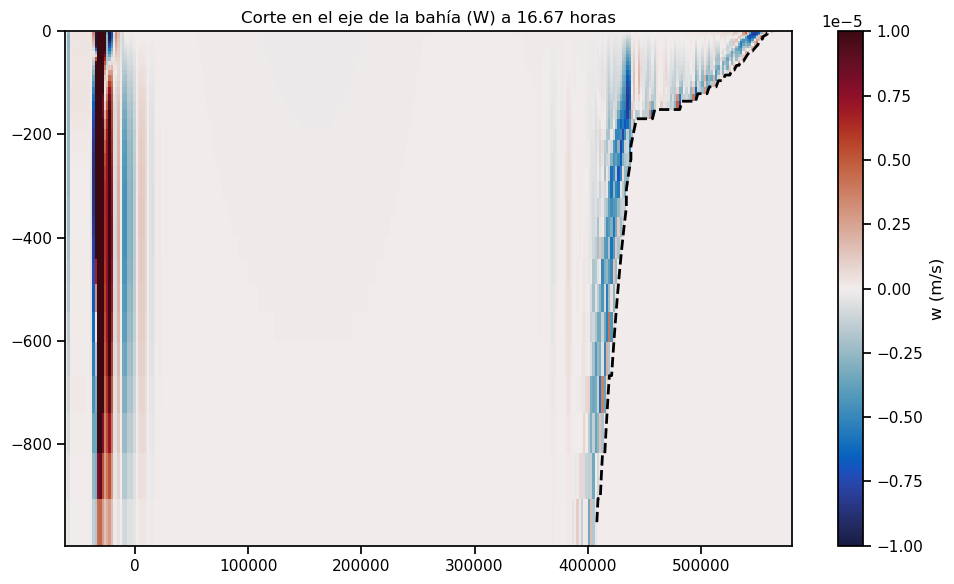

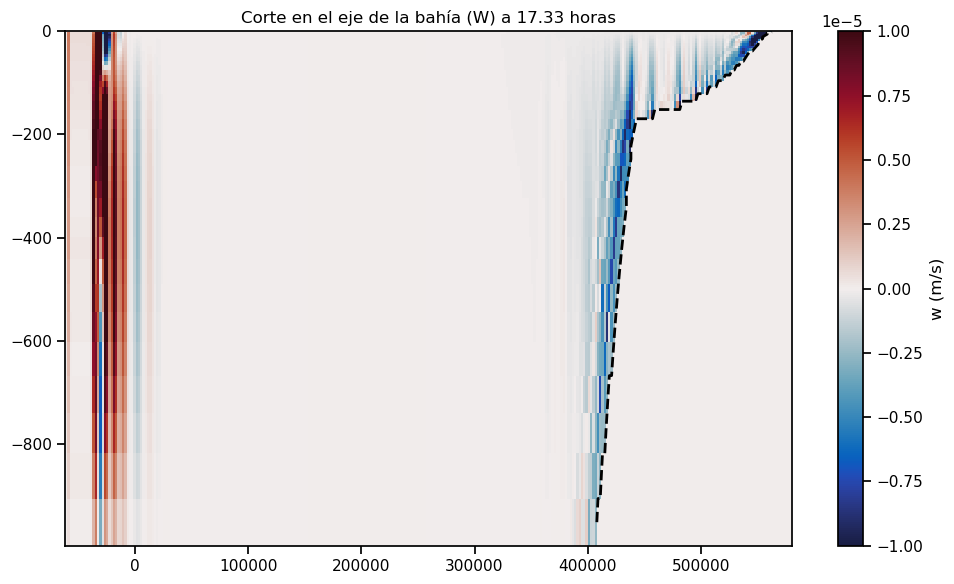

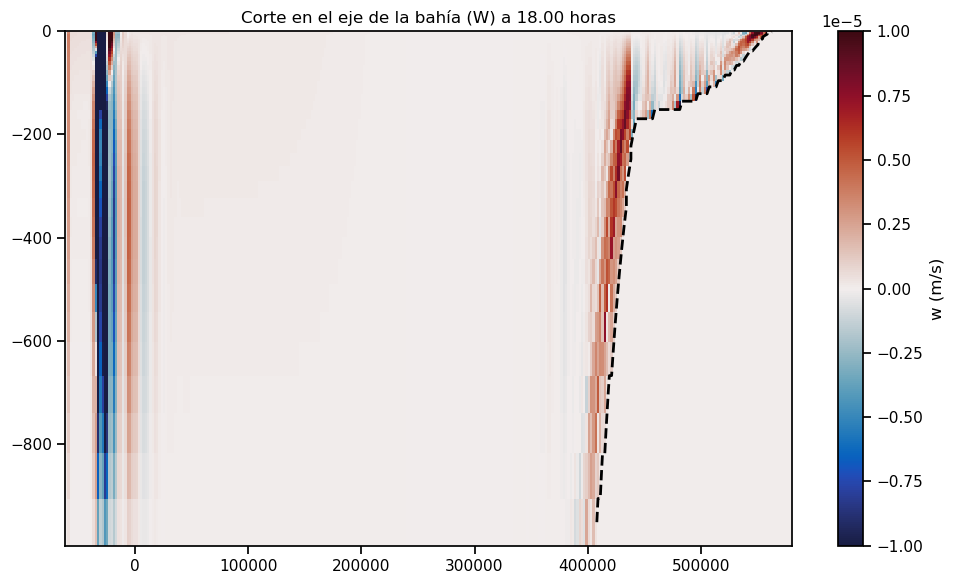

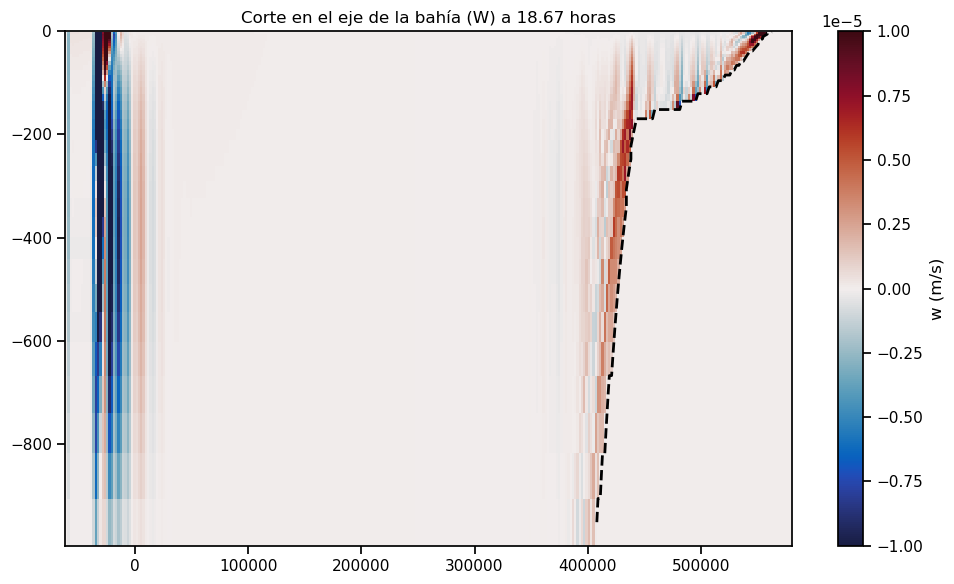

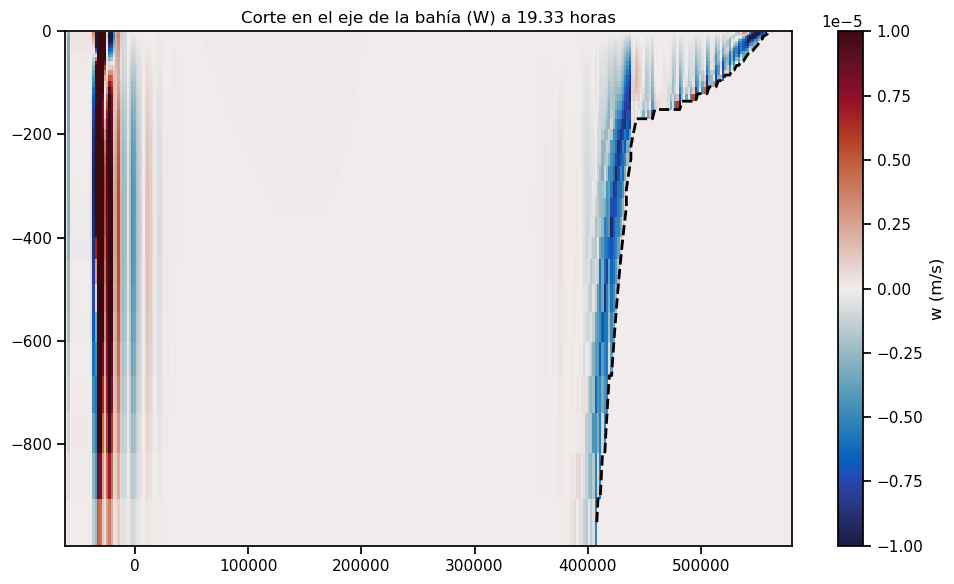

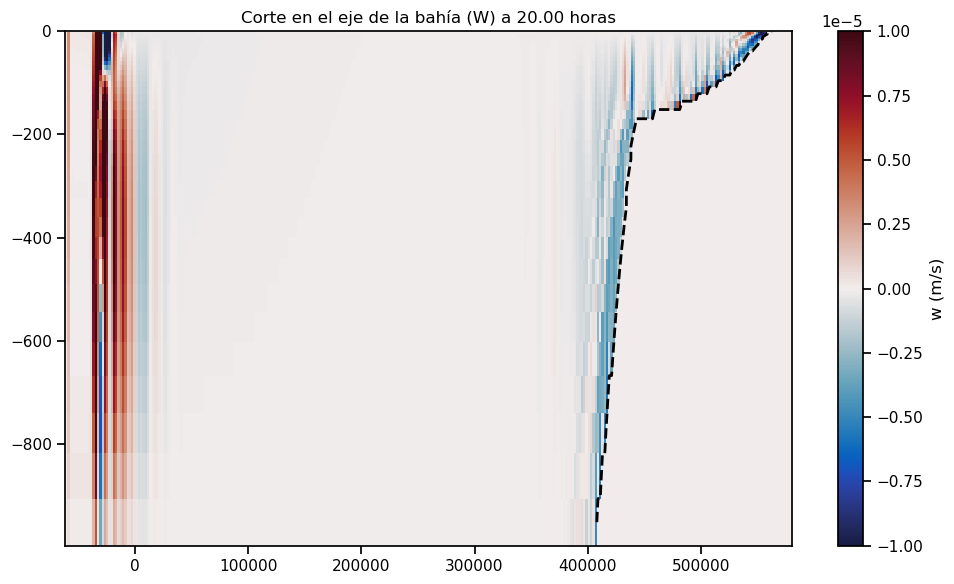

In [19]:
EjeXBay= int(272/2)

for tt in range(0, len(time), 2):
    
    W1 = nc.variables['W'][tt,:,:,EjeXBay]
    W2 = nc2.variables['W'][tt,:,:,EjeXBay]
    W = W1#-W2
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
    mesh = ax.pcolormesh(YC[:, 0],RC,W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    ax.contour(YC[:, 0], RC, mask3D[:,:,EjeXBay], colors='black', linewidths=2, linestyles='--')
    fig.colorbar(mesh, ax=ax, label='w (m/s)')  # Etiqueta de la barra de colores
    ax.set_title(f'Corte en el eje de la bahía (W) a {time[tt]/3600:.2f} horas')
    #ax.set_aspect(1)
    plt.tight_layout()
    plt.show()



# Animaciones

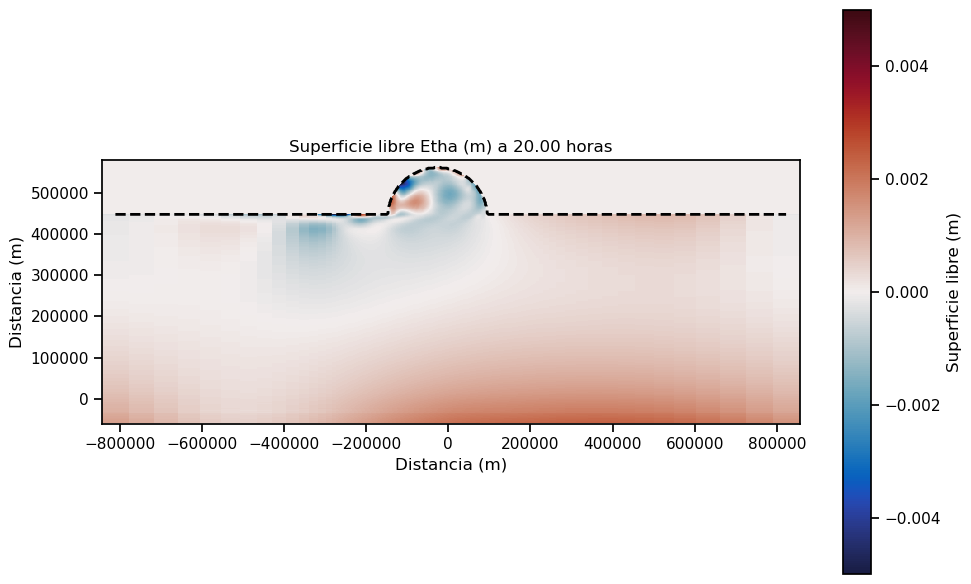

In [20]:
### ANIMATION ETHA:JUST RUN WITH BAY

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(Eta), 
                     vmin=-0.005, vmax=0.005, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Superficie libre (m)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Superficie libre Eta (m)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    Eta1 = nc.variables['Eta'][tt, :, :]# Velocidad vertical a la profundidad deseada
    Eta2 = nc2.variables['Eta'][tt, :, :]
    Eta = Eta1
    mesh.set_array(Eta.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Superficie libre Etha (m) a {time[tt] / 3600:.2f} horas")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationEtha1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

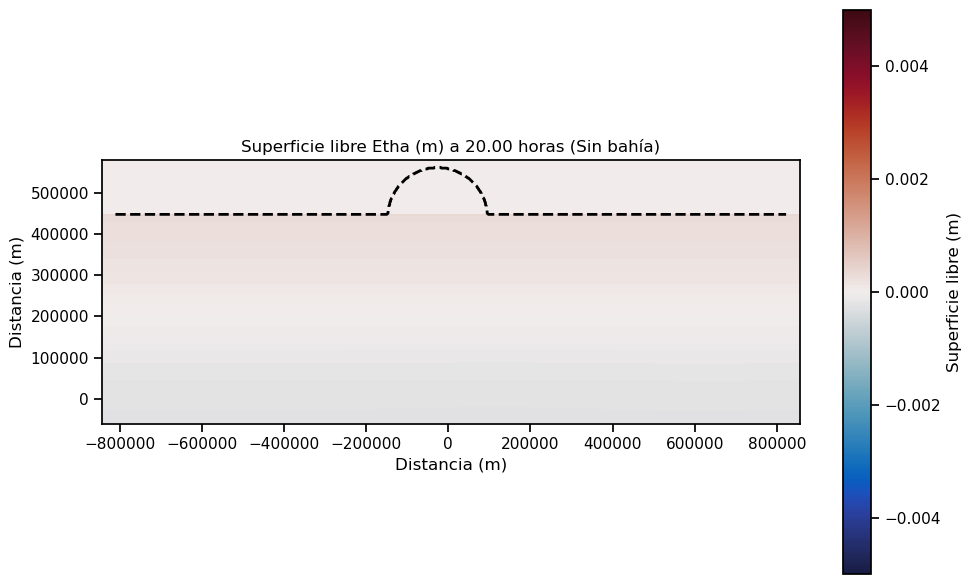

In [21]:
### ANIMATION ETHA: RUN WITH BAY - RUN WITHOUT BAY

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(Eta), 
                     vmin=-0.005, vmax=0.005, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Superficie libre (m)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Superficie libre Eta (m)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    Eta1 = nc.variables['Eta'][tt, :, :]# Velocidad vertical a la profundidad deseada
    Eta2 = nc2.variables['Eta'][tt, :, :]
    Eta = Eta2
    mesh.set_array(Eta.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Superficie libre Etha (m) a {time[tt] / 3600:.2f} horas (Sin bahía)")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationEtha_diff1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

In [22]:
W.shape
W = nc.variables['W'][0,9,:,:]

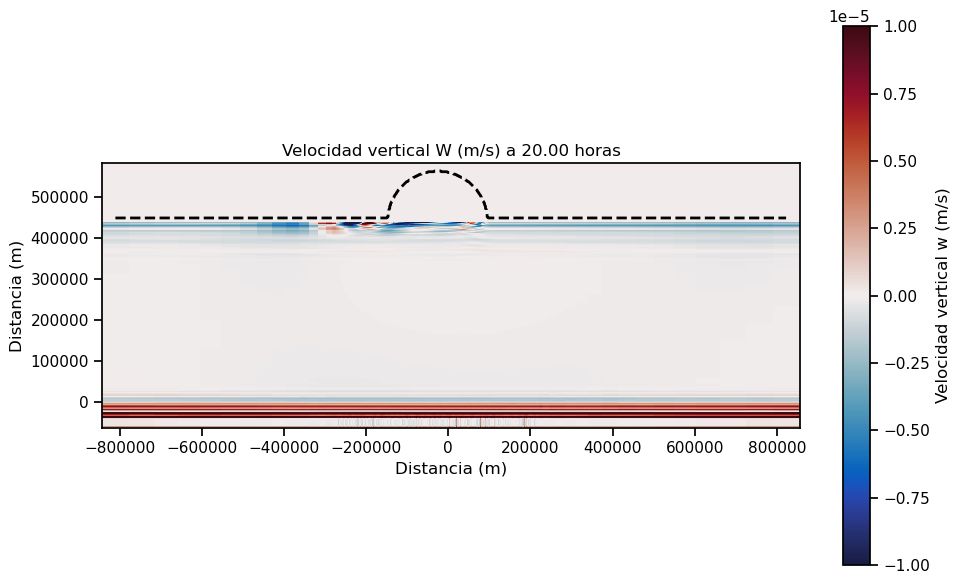

In [23]:
### ANIMATION W:JUST RUN WITH BAY

W= nc.variables['W'][tt, 25, :, :]
W.shape

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(W), 
                     vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Velocidad vertical w (m/s)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Velocidad vertical w (m/s)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    W1 = nc.variables['W'][tt, 25, :, :]  # Velocidad vertical a la profundidad deseada con bahia
    W2 = nc2.variables['W'][tt, 25, :, :]  #Sin bahia
    W = W1#-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Velocidad vertical W (m/s) a {time[tt] / 3600:.2f} horas")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationW1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

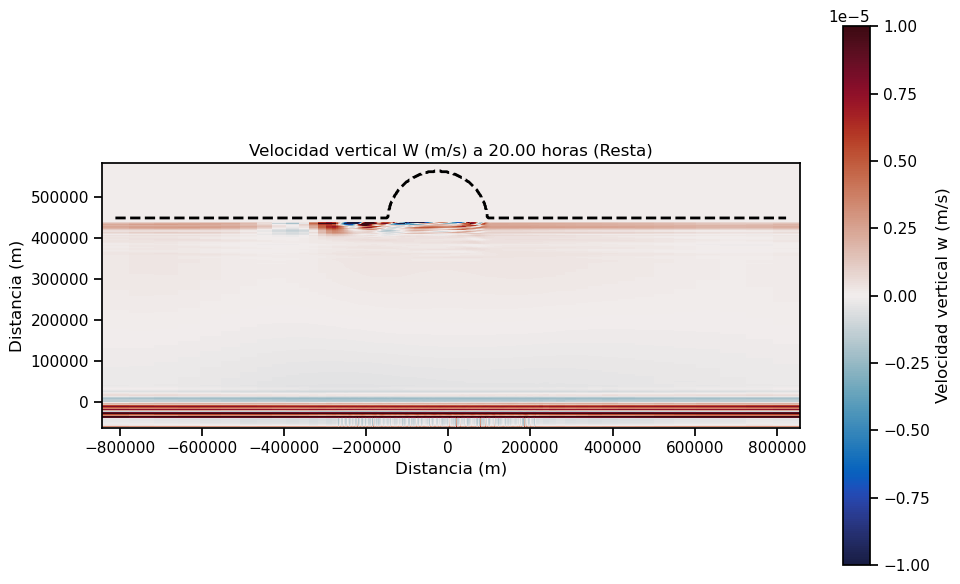

In [24]:
### ANIMATION W: RUN WITH BAY -WITHOUT BAY

W= nc.variables['W'][tt, 25, :, :]
W.shape

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(W), 
                     vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Velocidad vertical w (m/s)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Velocidad vertical w (m/s)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    W1 = nc.variables['W'][tt, 25, :, :]  # Velocidad vertical a la profundidad deseada con bahia
    W2 = nc2.variables['W'][tt, 25, :, :]  #Sin bahia
    W = W1-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Velocidad vertical W (m/s) a {time[tt] / 3600:.2f} horas (Resta)")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationW_diff1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

In [25]:
W = nc.variables['W'][tt, :, :, 136] 

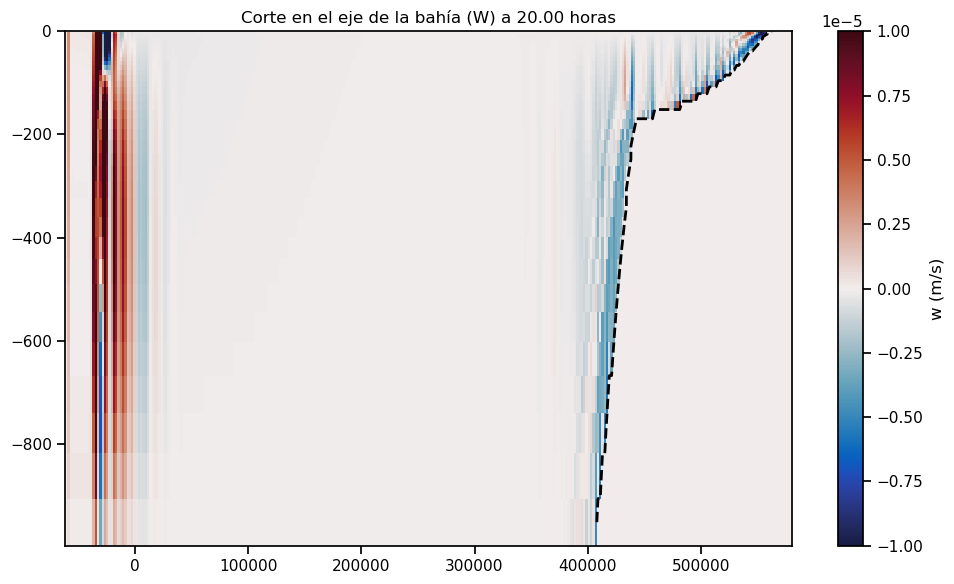

In [32]:
### ANIMATION PERFIL W:JUST RUN WITH BAY

W = nc.variables['W'][tt,:,:,EjeXBay] 

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo
# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
mesh = ax.pcolormesh(YC[:, 0],RC,W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
ax.contour(YC[:, 0], RC, mask3D[:,:,EjeXBay], colors='black', linewidths=2, linestyles='--')
fig.colorbar(mesh, ax=ax, label='w (m/s)')  # Etiqueta de la barra de colores
ax.set_title(f'Corte en el eje de la bahía (W) a {time[tt]/3600:.2f} horas')
#ax.set_aspect(1)
plt.tight_layout()
plt.show()

# Función de actualización para la animación
def update(tt):
    EjeXBay= int(272/2)
    W1 = nc.variables['W'][tt,:,:,EjeXBay]
    W2 = nc2.variables['W'][tt,:,:,EjeXBay]
    W = W1#-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"f'Corte en el eje de la bahía (W) a {time[tt] / 3600:.2f} horas")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationWperfil1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 




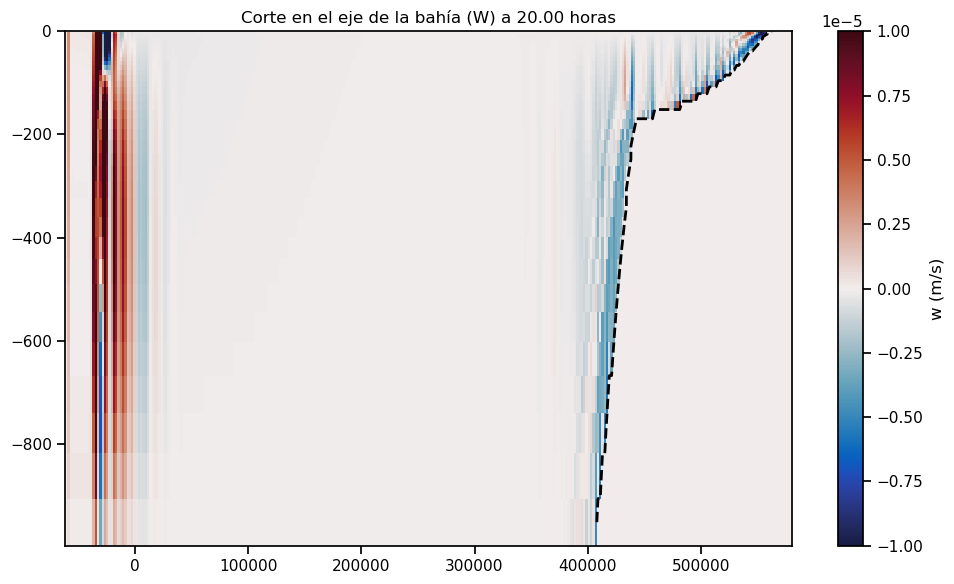

In [27]:
### ANIMATION PERFIL W: RUN WITH BAY - WITHOUT BAY

W = nc.variables['W'][tt,:,:,EjeXBay] 

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo
# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
mesh = ax.pcolormesh(YC[:, 0],RC,W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
ax.contour(YC[:, 0], RC, mask3D[:,:,EjeXBay], colors='black', linewidths=2, linestyles='--')
fig.colorbar(mesh, ax=ax, label='w (m/s)')  # Etiqueta de la barra de colores
ax.set_title(f'Corte en el eje de la bahía (W) a {time[tt]/3600:.2f} horas')
#ax.set_aspect(1)
plt.tight_layout()
plt.show()

# Función de actualización para la animación
def update(tt):
    EjeXBay= int(272/2)
    W1 = nc.variables['W'][tt,:,:,EjeXBay]
    W2 = nc2.variables['W'][tt,:,:,EjeXBay]
    W = W1-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"f'Corte en el eje de la bahía (W) a {time[tt] / 3600:.2f} horas (Resta)")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationWperfil_diff1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 




In [41]:
from IPython.display import Video

# Mostrar videos en un notebook
Video('animationEtha.mp4', width=400)



In [42]:
Video('animationEtha_diff.mp4', width=400)

In [28]:
### VIDEOS COMPARACIÓN ETHA

from moviepy import VideoFileClip, clips_array

# Rutas de los videos
video1_path = 'animationEtha.mp4'
video2_path = 'animationEtha1.mp4'
#video2_path = 'animationEtha_diff.mp4'

# Cargar los videos
clip1 = VideoFileClip(video1_path)
clip2 = VideoFileClip(video2_path)

combined = clips_array([[clip1, clip2]])
combined.preview()


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1000, 600], 'bitrate': 80, 'fps': 2.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.19.100 libx264'}}], 'input_number': 0}], 'duration': 30.5, 'bitrate': 80, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1000, 600], 'video_bitrate': 80, 'video_fps': 2.0, 'video_duration': 30.5, 'video_n_frames': 61}
/opt/anaconda3/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i animationEtha.mp4 -loglevel error -f image2pipe -vf scale=1000:600 -sws_flags bicubic

In [29]:
### VIDEOS COMPARACIÓN W

from moviepy import VideoFileClip, clips_array

# Rutas de los videos
video1_path = 'animationW.mp4'
video2_path = 'animationW1.mp4'
#video2_path = 'animationW_diff.mp4'

# Cargar los videos
clip1 = VideoFileClip(video1_path)
clip2 = VideoFileClip(video2_path)

combined = clips_array([[clip1, clip2]])
combined.preview()


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1000, 600], 'bitrate': 66, 'fps': 2.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.19.100 libx264'}}], 'input_number': 0}], 'duration': 30.5, 'bitrate': 66, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1000, 600], 'video_bitrate': 66, 'video_fps': 2.0, 'video_duration': 30.5, 'video_n_frames': 61}
/opt/anaconda3/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i animationW.mp4 -loglevel error -f image2pipe -vf scale=1000:600 -sws_flags bicubic -p

In [33]:
### VIDEOS COMPARACIÓN PERFIL W

from moviepy import VideoFileClip, clips_array

# Rutas de los videos
video1_path = 'animationWperfil.mp4'
video1_path = 'animationWperfil1.mp4'
#video2_path = 'animationWperfil_diff.mp4'

# Cargar los videos
clip1 = VideoFileClip(video1_path)
clip2 = VideoFileClip(video2_path)

combined = clips_array([[clip1, clip2]])
combined.preview()


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1000, 600], 'bitrate': 94, 'fps': 2.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.19.100 libx264'}}], 'input_number': 0}], 'duration': 30.5, 'bitrate': 94, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1000, 600], 'video_bitrate': 94, 'video_fps': 2.0, 'video_duration': 30.5, 'video_n_frames': 61}
/opt/anaconda3/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i animationWperfil1.mp4 -loglevel error -f image2pipe -vf scale=1000:600 -sws_flags bic